# <center>Temps de Réponse de la Brigade des Pompiers de Londres</center>

In [8]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 9999

In [9]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
%matplotlib inline

In [10]:
from IPython.display import display_markdown
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [11]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 40)

In [12]:
import os
#print(os.path.abspath(os.path.join(yourpath, os.pardir)))
# data_raw_path = print(os.path.join(root_folder_path, "data", "raw"))
root_folder_path = os.path.abspath('..')
data_raw_path = os.path.join(root_folder_path, "data", "raw")
incidents_folder_path = os.path.join(root_folder_path, "london-fire-brigade-mobilisation-records")
print(os.path.abspath('.'))
print(incidents_folder_path)

h:\CollaborativeProjects\DataScientest\Jan24_cds_Pompiers\notebooks
h:\CollaborativeProjects\DataScientest\Jan24_cds_Pompiers\london-fire-brigade-mobilisation-records


# **1.Lecture des données (Fichiers Incidents)**

In [13]:
incidents_folder_path: str = r'H:\CollaborativeProjects\DataScientest\Jan24_cds_Pompiers\data\raw\london-fire-brigade-incident-records'

In [14]:
incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),
                                            date_format='%d-%b-%y',
                                            parse_dates=['DateOfCall'],
                                            dayfirst=True,
                                            sep=",")

incident_data_from_2018_to_onwards = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2018 onwards.csv"),
                                                date_format='%d-%b-%y',
                                                parse_dates=['DateOfCall'],
                                                dayfirst=True,
                                                sep=",",
                                                encoding='unicode_escape')

C:\Users\courio\AppData\Local\Temp\ipykernel_19384\2947356504.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_data_from_2009_to_2017 = pd.read_csv(os.path.join(incidents_folder_path, "LFB Incident data from 2009 - 2017.csv"),


In [15]:
# vérifier si nous avons le même nombre de colonnes pour le merge.
coluns_intersect: int = len((set(incident_data_from_2009_to_2017.columns) & set(incident_data_from_2018_to_onwards.columns)))
if(len(incident_data_from_2009_to_2017.columns) == len(incident_data_from_2018_to_onwards.columns) 
   and coluns_intersect == len(incident_data_from_2009_to_2017.columns)):
    print("Nous avons le même nombre de colonnes.")

# Concatenons les 2 DataFrames verticalement.
incidents_df = pd.concat([incident_data_from_2009_to_2017, incident_data_from_2018_to_onwards], axis=0)
incidents_df.head()

Nous avons le même nombre de colonnes.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,235138081.0,2009-01-01,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,SW11,NaN,NaN,E09000032,WANDSWORTH,Wandsworth,E05014010,Battersea Park,Battersea Park,528652.0,176830.0,528650,176850,51.475812,-0.148894,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0,2,60,255,1.0
1,1091.0,2009-01-01,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,SE1,NaN,NaN,E09000022,LAMBETH,Lambeth,E05014118,Waterloo & South Bank,Waterloo & South Bank,530485.0,179007.0,530450,179050,51.494957,-0.121712,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,1,60,255,1.0
2,2091.0,2009-01-01,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,N9,NaN,NaN,E09000010,ENFIELD,Enfield,E05013682,Haselbury,Haselbury,533773.0,194492.0,533750,194450,51.633342,-0.068488,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0,1,60,255,2.0
3,3091.0,2009-01-01,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,1.000215e+11,21401491.0,E09000017,HILLINGDON,Hillingdon,E05013571,Hillingdon East,Hillingdon East,507738.0,182805.0,507750,182850,51.533882,-0.448089,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0,1,60,255,2.0
4,5091.0,2009-01-01,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,N7,NaN,NaN,E09000019,ISLINGTON,Islington,E05013708,Laycock,Laycock,531058.0,185307.0,531050,185350,51.551441,-0.111120,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0,2,60,255,1.0


### Acronyms

In [16]:
metadata = pd.read_excel(os.path.join(incidents_folder_path, "Metadata.xlsx"), usecols=['Column', 'Description2']).rename(columns={'Column': 'Variable', 'Description2': 'Description'})
display(metadata)

,Variable,Description
0,IncidentNumber,Numéro d'incident du LFB
1,DateOfCall,Date de l'appel au 999
2,CalYear,Année de l'appel au 999
3,TimeOfCall,Temps de l'appel au 999
4,HourOfCall,Heure de l'appel au 999
5,IncidentGroup,Catégorie d'incident de haut niveau
6,StopCodeDescription,Catégorie d'incident détaillée
7,SpecialServiceType,Détails supplémentaires pour les catégories d'...
8,PropertyCategory,Descripteur de propriété de haut niveau
9,PropertyType,Description détaillé de la propriété


## Objectif :

#### Analyse de Forme [(voir détails ici)](#) :
- **Variable target** : FirstPumpArriving_AttendanceTime
- **Lignes et colonnes** : 1691361, 39
- **Types de variables** : qualitatives : 20, quantitatives : 19
- **Analyse des valeurs manquantes** :

    - Liste des colonnes n'ayant pas de Nan à la 1ere analyse : **['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall','IncidentGroup', 'StopCodeDescription',         'PropertyCategory','PropertyType', 'AddressQualifier', 'Postcode_district','IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase','Easting_rounded', 'Northing_rounded', 'FRS', 'PumpCount','PumpMinutesRounded', 'Notional Cost (£)', 'MonthOfCall']**

    - Il y'a **19** variables qui ont des valeurs NaN.
        - Liste des colonnnes ayant plus de 49% de Nan : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation']**
        - Les valeurs nulles de colonnes **FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,NumCalls** sont remplacées par leur mode         
        
    - Il faudra checker le cas DateOfCall avec les NaN

#### Analyse de Fond :
- **Visualisation de la target** :
    - La variable cible **FirstPumpArriving_AttendanceTime** contient des NaN (On checkera si on peut remplir les NaN plus tard) ou les supprimer les lignes.
    
- **Traitement sur les colonnes**
    - Suppression des colonnes ayannt beaucoupt de valeurs nulles : **['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation']**
    - Suppression des colonnes n'ayant pas d'impact sur le dataset : **['UPRN', 'USRN','IncGeo_WardCode','IncGeo_WardName','IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation']**
    - 
    - Le type de la colonne **DateOfCall**  et **TimeOfCall** a été changée en Datetime
    
- **Signification des variables** :
    -  variables continues pas standardisées
    - 

- **Relation Variables catégorielles / Target** :
    - Ces varibales on plus d'impact sur la target
    - 
    - 


- **Relation Variables continuess / Target** :
    - Ces varibales on moins d'impact sur la target
    - 
    - 
    
    
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - 
    - 
    - 
    - 
    - 
    - 


    

### **2.1 Analyse de la forme des données**

In [17]:
incidents_df.shape

(1691361, 39)

Ce dataset **incidents** après merge contient **1691361 lignes et 39 colonnes**

In [18]:
display(incidents_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1691361 entries, 0 to 703081
Data columns (total 39 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   IncidentNumber                          object        
 1   DateOfCall                              datetime64[ns]
 2   CalYear                                 int64         
 3   TimeOfCall                              object        
 4   HourOfCall                              int64         
 5   IncidentGroup                           object        
 6   StopCodeDescription                     object        
 7   SpecialServiceType                      object        
 8   PropertyCategory                        object        
 9   PropertyType                            object        
 10  AddressQualifier                        object        
 11  Postcode_full                           object        
 12  Postcode_district                       object  

None

object            20
float64           11
int64              7
datetime64[ns]     1
Name: count, dtype: int64

<Axes: ylabel='count'>

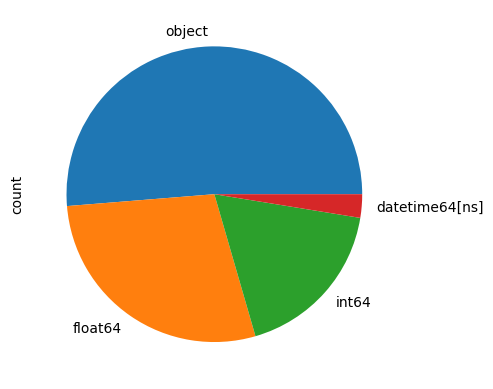

In [19]:
display(incidents_df.dtypes.value_counts())
incidents_df.dtypes.value_counts().plot.pie()

In [20]:
# Analyse descriptive des variables continue.
incidents_df.select_dtypes(exclude=['object']).describe()

,DateOfCall,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
count,1691361,1.691361e+06,1.691361e+06,1.550028e+06,1.528490e+06,853807.000000,853807.000000,1.691361e+06,1.691361e+06,853807.000000,853807.000000,1.559702e+06,604911.000000,1.678254e+06,1.678254e+06,1.691361e+06,1.691361e+06,1.691361e+06,1.689515e+06
mean,2016-08-07 02:19:30.122759680,2.016099e+03,1.347415e+01,2.216739e+10,2.030646e+07,530633.993650,180364.044359,5.306637e+05,1.804959e+05,51.451775,-0.118846,3.180479e+02,394.924834,1.367176e+00,1.554516e+00,1.591760e+00,7.632328e+01,3.974395e+02,1.330867e+00
min,2009-01-01 00:00:00,2.009000e+03,0.000000e+00,0.000000e+00,0.000000e+00,503582.000000,155901.000000,5.035500e+05,1.559500e+05,0.000000,-0.510155,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.550000e+02,1.000000e+00
25%,2012-06-12 00:00:00,2.012000e+03,9.000000e+00,0.000000e+00,2.040096e+07,525198.500000,175988.000000,5.252500e+05,1.761500e+05,51.468933,-0.197280,2.310000e+02,294.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,2.600000e+02,1.000000e+00
50%,2016-08-21 00:00:00,2.016000e+03,1.400000e+01,0.000000e+00,2.120124e+07,530796.000000,180982.000000,5.309500e+05,1.810500e+05,51.512882,-0.117025,2.960000e+02,368.000000,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+01,3.280000e+02,1.000000e+00
75%,2020-09-13 00:00:00,2.020000e+03,1.900000e+01,1.001403e+10,2.210116e+07,536833.000000,184935.000000,5.362500e+05,1.851500e+05,51.547736,-0.028804,3.780000e+02,463.000000,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+01,3.520000e+02,1.000000e+00
max,2024-03-31 00:00:00,2.024000e+03,2.300000e+01,2.000044e+11,9.999042e+07,561126.000000,200906.000000,6.111500e+05,3.024500e+05,51.691670,0.322219,1.200000e+03,1200.000000,4.600000e+01,1.060000e+02,9.510000e+02,5.256290e+05,2.277726e+06,3.690000e+02
std,NaN,4.590807e+00,6.246800e+00,4.776722e+10,4.379204e+06,10329.435022,7437.720221,9.721260e+03,7.355635e+03,1.687489,0.148906,1.388444e+02,153.510240,6.774396e-01,8.372198e-01,1.588198e+00,5.765348e+02,2.724155e+03,1.489883e+00


In [21]:
# Analyse descriptive des variables qualitatives.
incidents_df.select_dtypes(include=['object']).describe()

,IncidentNumber,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation
count,1691361.0,1691361,1691361,1691361,544772,1691361,1691361,1691361,853807,1691361,1691361,1691361,1691361,1691057,1691057,1691057,1691361,1691360,1559691,604904
unique,1691361.0,121658,3,10,21,9,292,11,117966,329,33,33,33,899,1484,1481,1,103,117,114
top,235138081.0,19:11:16,False Alarm,AFA,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,SW17 0QT,CR0,E09000033,WESTMINSTER,Westminster,E05013808,West End,West End,London,Soho,Soho,Hammersmith
freq,1.0,56,830352,625944,117098,829837,209574,949359,1805,33017,124791,124791,124791,31431,27583,27583,1691361,60179,52793,15561


In [22]:
incidents_df.isna().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1146589
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              837554
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                               304
IncGeo_WardName                               304


**Des valeurs manquantes existent la base de données.**

Liste des colonnes ayant des valeurs manquantes.

In [23]:
#(incidents_df.isna().sum()/incidents_df.shape[0]).sort_values(ascending=True)
def pourcentage_de_valeurs_manquantes(data) -> None:

    nombre_de_lignes = data.shape[0]
    
    for i in range(0, len(data.isna().sum(axis=0))):
        print("Pour la variable", data.isna().sum(axis=0).index[i], "le pourcentage de NaN est de", np.round(data.isna().sum(axis=0)[i]*100/nombre_de_lignes, 2), "%")

        
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ] / incidents_df.shape[0] * 100.00

SpecialServiceType                        67.790909
Postcode_full                             49.519529
UPRN                                       8.356170
USRN                                       9.629582
IncGeo_WardCode                            0.017974
IncGeo_WardName                            0.017974
IncGeo_WardNameNew                         0.017974
Easting_m                                 49.519529
Northing_m                                49.519529
Latitude                                  49.519529
Longitude                                 49.519529
IncidentStationGround                      0.000059
FirstPumpArriving_AttendanceTime           7.784205
FirstPumpArriving_DeployedFromStation      7.784855
SecondPumpArriving_AttendanceTime         64.235252
SecondPumpArriving_DeployedFromStation    64.235666
NumStationsWithPumpsAttending              0.774938
NumPumpsAttending                          0.774938
NumCalls                                   0.109143
dtype: float

In [24]:
(incidents_df.isna().sum()[incidents_df.isna().sum() / incidents_df.shape[0] > 0.49 ]).index

Index(['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m',
       'Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation'],
      dtype='object')

In [25]:
# Affichage du pourcentage de valeurs manquantes pour chaque variable de la base de données "lieux".
# pourcentage_de_valeurs_manquantes(incidents_df)
print(incidents_df['DateOfCall'].isna().sum())

0


<Axes: >

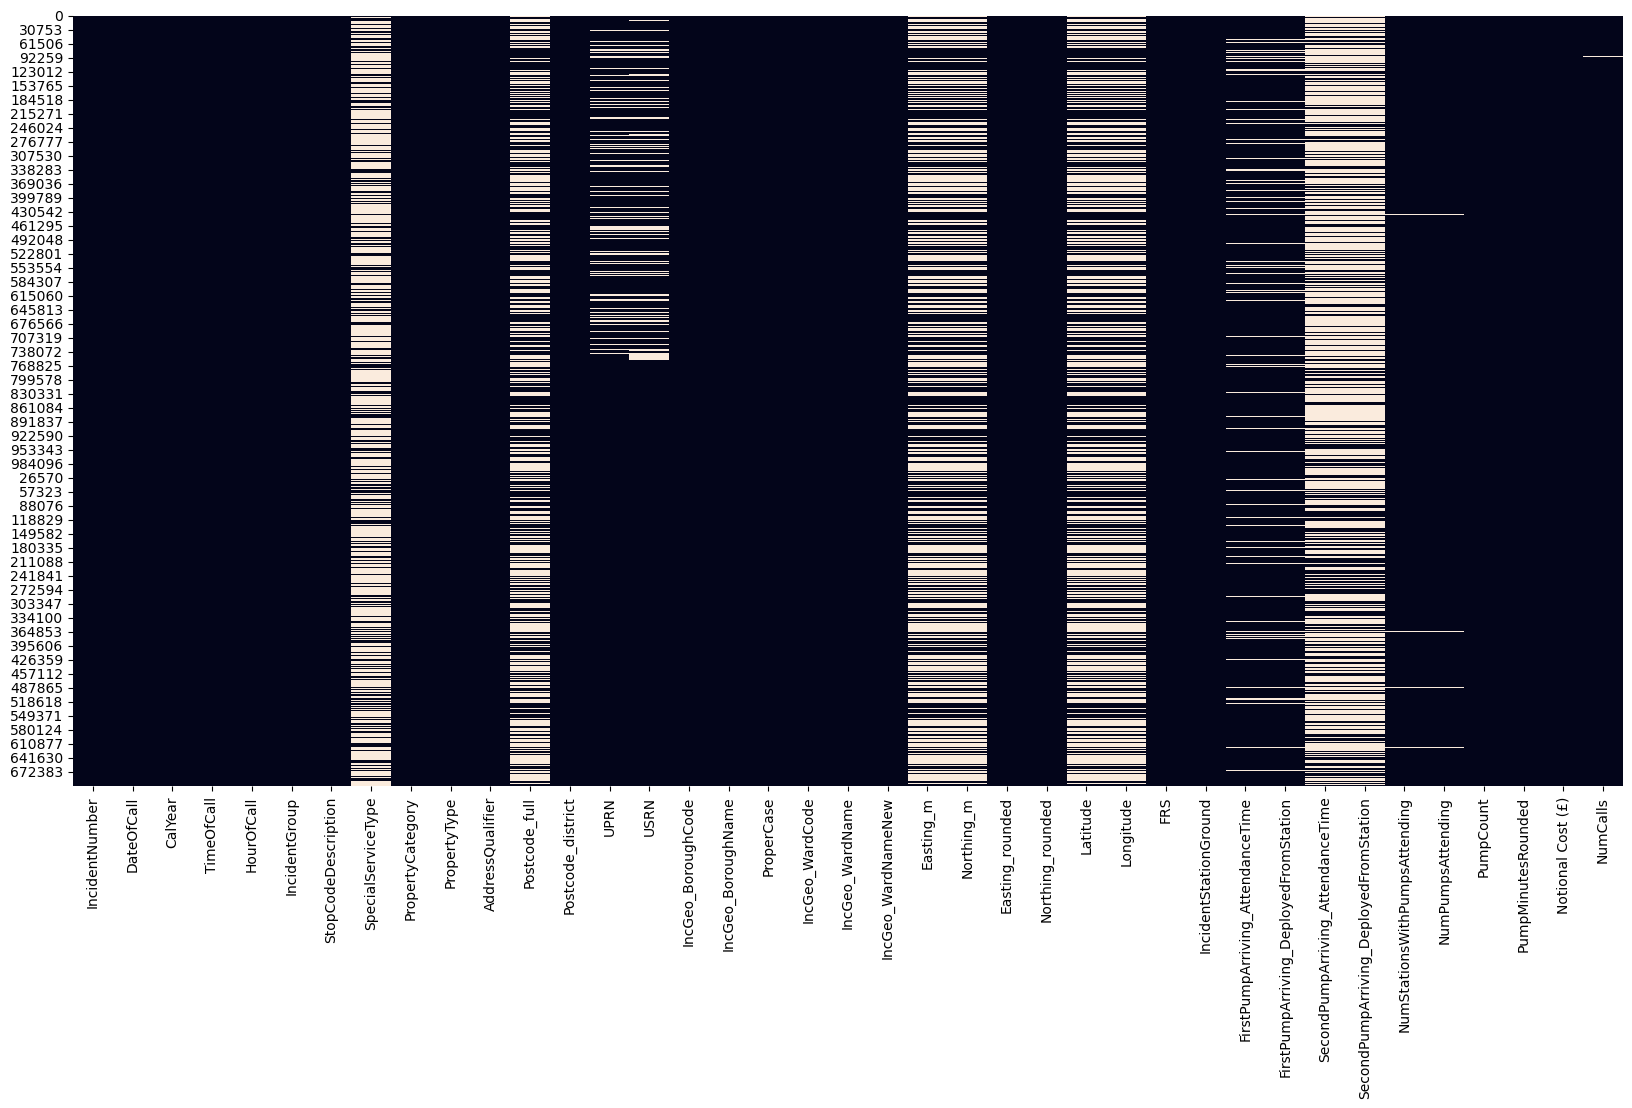

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(incidents_df.isna(), cbar=False)

### **2.2 Analyse du Fond**


In [27]:
#from ydata_profiling import ProfileReport
#import ydata-profiling
#london_profile = ProfileReport(incidents_df)

#### **2.2.1 Elimination des colonnes inutiles**

Listes des colonnes à supprimer
incidents_df.isna().sum()[incidents_df.isna().sum() > 0 ] / incidents_df.shape[0] * 100.00

**Colonnes ayant beaucoup de valeurs nulles**

- **SpecialServiceType**, contient plus de 67% de valeurs nulles, la colonne  **"StopCodeDescription"** joue déjà le même rôle.
- **Postcode_full** , contient plus de 49% de valeurs nulles, On ne peut pas reconstituer les valeurs nulles,on pourra utiliser la colonne  **"Postcode_district"**.
- **Easting_m** , contient plus de 49% de valeurs nulles
- **Northing_m** , contient plus de 49% de valeurs nulles
- **Latitude** , contient plus de 49% de valeurs nulles.
- **Longitude** , contient plus de 49% de valeurs nulles.
- **SecondPumpArriving_AttendanceTime** , contient plus de 64% de valeurs nulles.
- **SecondPumpArriving_DeployedFromStation** , contient plus de 64% de valeurs nulles.

In [28]:
incidents_df = incidents_df.drop(['SpecialServiceType', 'Postcode_full', 'Easting_m', 'Northing_m','Latitude', 'Longitude', 'SecondPumpArriving_AttendanceTime','SecondPumpArriving_DeployedFromStation'],axis=1)

In [29]:
# incidents_df.mode().iloc[0]

**Colonnes n'ayant pas d'utilité**

In [30]:
incidents_df = incidents_df.drop(['UPRN', 'USRN','IncGeo_WardCode','IncGeo_WardName','IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation'],axis=1)

**Suppression des lignes nulles de la colonne car il y'en a pas beaucoup , comparées aux nombre totales de lignes**

In [31]:
incidents_df = incidents_df.dropna(subset=['IncidentStationGround'])

**Suppression de la colonne ProperCase , car ce sont les mêmes informations que la colonne IncGeo_BoroughName**

In [32]:
incidents_df = incidents_df.drop(['ProperCase'],axis=1)

**La colonne NumPumpsAttending et PumpCount se ressemble beaucoup, voir pour supprimer l'une des 2.**

In [33]:
# Supprimer NumPumpsAttending	

**Columns A Réparer**

- FirstPumpArriving_AttendanceTime           7.784205
- NumStationsWithPumpsAttending              0.774938
- NumPumpsAttending                          0.774938
- NumCalls                                   0.109143

In [34]:
incidents_df['FirstPumpArriving_AttendanceTime'] = incidents_df['FirstPumpArriving_AttendanceTime'].fillna(incidents_df['FirstPumpArriving_AttendanceTime'].median())
incidents_df['PumpCount'] = incidents_df['PumpCount'].fillna(incidents_df['PumpCount'].median())
incidents_df['NumStationsWithPumpsAttending'] =  incidents_df['NumStationsWithPumpsAttending'].fillna(incidents_df['NumStationsWithPumpsAttending'].median())
incidents_df['NumPumpsAttending'] = incidents_df['NumPumpsAttending'].fillna( incidents_df['NumPumpsAttending'].median())
incidents_df['NumCalls'] = incidents_df['NumCalls'].fillna( incidents_df['NumCalls'].median())

**Supprimer les lignes dupliquées**

In [35]:
duplicated = incidents_df['IncidentNumber'].duplicated(keep=False)
duplicate_rows = incidents_df[duplicated].sort_values(by='IncidentNumber')

print(duplicate_rows)

Empty DataFrame
Columns: [IncidentNumber, DateOfCall, CalYear, TimeOfCall, HourOfCall, IncidentGroup, StopCodeDescription, PropertyCategory, PropertyType, AddressQualifier, Postcode_district, IncGeo_BoroughCode, IncGeo_BoroughName, Easting_rounded, Northing_rounded, FRS, IncidentStationGround, FirstPumpArriving_AttendanceTime, NumStationsWithPumpsAttending, NumPumpsAttending, PumpCount, PumpMinutesRounded, Notional Cost (£), NumCalls]
Index: []


**Changement de type de certaines colonnes**

In [36]:
# Change le type de quelques colonnes et ajoute la colonne MonthOfCall
incidents_df['TimeOfCall'] =  pd.to_datetime(incidents_df['TimeOfCall'], format=r'%H:%M:%S')
#incidents_df['MonthOfCall'] = pd.to_datetime(incidents_df['DateOfCall']).dt.month

#### **2.2.2 Variables qualitatives**

In [37]:
def analyse_variable_binaire(variable, base):

    print("Répartition de la variable: ", end="\n\n")

    print(base[variable].value_counts(normalize=True, dropna=False),
          end="\n\n")

    print("Matrice de contingence: ", end="\n\n")

    print(pd.crosstab(base[variable], base['Response'], normalize='index'))

    sns.countplot(x=variable, data=base)

    plt.title(f'Répartition de {variable} \n', fontsize=20)

    plt.show()

In [38]:
#categorical_features = list(incidents_df.select_dtypes(exclude=np.number).columns)
categorical_features = list(incidents_df.select_dtypes('object').columns)
categorical_features.remove('IncidentNumber')
for col in categorical_features:
    print(f'{col :-<50} {incidents_df[col].nunique()}')

IncidentGroup------------------------------------- 3
StopCodeDescription------------------------------- 10
PropertyCategory---------------------------------- 9
PropertyType-------------------------------------- 292
AddressQualifier---------------------------------- 11
Postcode_district--------------------------------- 329
IncGeo_BoroughCode-------------------------------- 33
IncGeo_BoroughName-------------------------------- 33
FRS----------------------------------------------- 1
IncidentStationGround----------------------------- 103


**IncidentGroup------------------------------------- ['Special Service' 'Fire' 'False Alarm']**

IncidentGroup
False Alarm        0.490937
Special Service    0.322169
Fire               0.186894
Name: proportion, dtype: float64

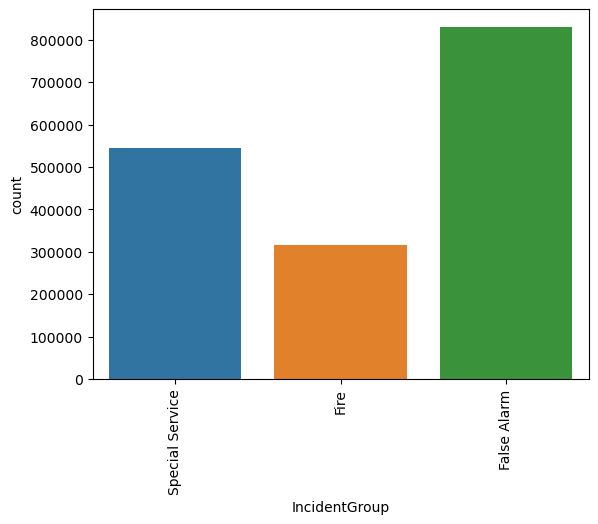

**StopCodeDescription------------------------------- ['Special Service' 'Secondary Fire' 'AFA' 'Primary Fire'
 'False alarm - Good intent' 'False alarm - Malicious' 'Chimney Fire'
 'Flood call attended - Batch mobilised' 'Late Call'
 'Use of Special Operations Room']**

StopCodeDescription
AFA                                      0.370083
Special Service                          0.320128
False alarm - Good intent                0.107535
Primary Fire                             0.096153
Secondary Fire                           0.090268
False alarm - Malicious                  0.013319
Flood call attended - Batch mobilised    0.001963
Chimney Fire                             0.000334
Late Call                                0.000140
Use of Special Operations Room           0.000078
Name: proportion, dtype: float64

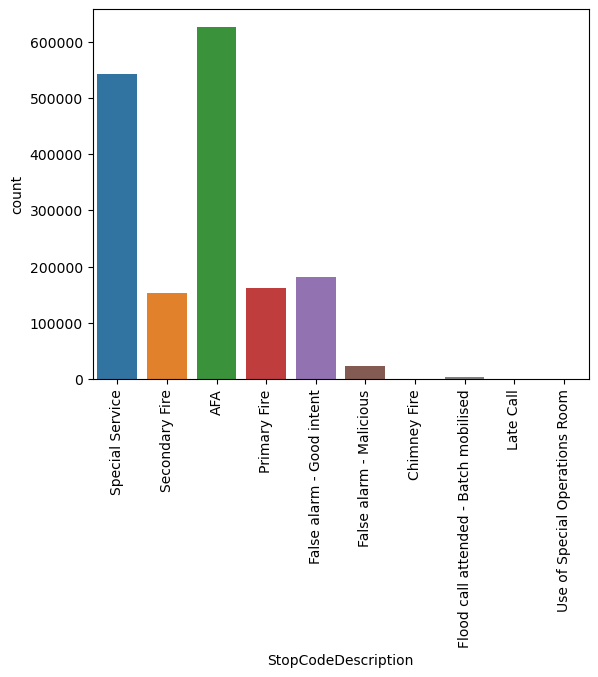

**PropertyCategory---------------------------------- ['Road Vehicle' 'Outdoor' 'Dwelling' 'Outdoor Structure'
 'Other Residential' 'Non Residential' 'Aircraft' 'Rail Vehicle' 'Boat']**

PropertyCategory
Dwelling             0.490633
Non Residential      0.231190
Outdoor              0.086095
Road Vehicle         0.073420
Other Residential    0.060061
Outdoor Structure    0.056546
Rail Vehicle         0.000828
Aircraft             0.000692
Boat                 0.000536
Name: proportion, dtype: float64

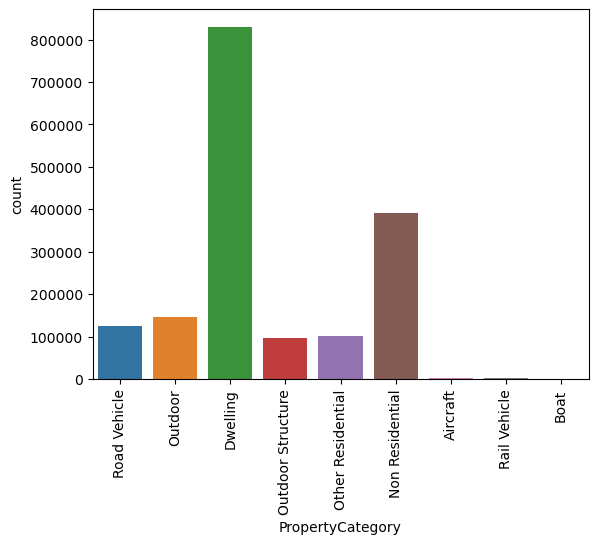

**PropertyType-------------------------------------- ['Car ' 'Lake/pond/reservoir ' 'Road surface/pavement '
 'Domestic garden (vegetation not equipment) '
 'Cycle path/public footpath/bridleway '
 'Purpose Built Flats/Maisonettes - Up to 3 storeys '
 'Refuse/rubbish tip ' 'Small refuse/rubbish container'
 'Student Hall of Residence ' 'House - single occupancy '
 'Converted Flat/Maisonette - Up to 2 storeys ' 'Loose refuse '
 'Department Store ' 'Purpose Built Flats/Maisonettes - 4 to 9 storeys '
 'Park ' 'Laundrette '
 'Purpose Built Flats/Maisonettes - 10 or more storeys ' 'Hotel/motel '
 'Restaurant/cafe' 'Other outdoor location '
 'Large refuse/rubbish container (eg skip/ paladin)' 'Museum '
 'House in Multiple Occupation - 3 or more storeys (not known if licensed)'
 'Post box ' 'Converted Flat/Maisonettes - 3 or more storeys' 'Casino '
 'Kiosk ' 'Club/night club ' 'Self contained Sheltered Housing '
 'Nursing/Care Home/Hospice' 'Hostel (e.g. for homeless people) '
 "Nurses'/Doctors' accommodation " 'Shelter '
 'Licensed House in Multiple Occupation - Up to 2 storeys '
 'Multi-Storey car park' 'Other bulk storage' 'Multiple Vehicles '
 'Roadside furniture (eg lamp posts/ road signs/ telegraph poles/ speed cameras)'
 'Monastery/convent ' 'Purpose built office ' 'Hospital '
 'Other building/use not known ' 'Airport - terminal ' 'Railway '
 'Railings' 'Tenement Building ' 'Local Government Office'
 'Other retail warehouse ' 'Single shop ' 'Factory ' 'Shopping Centre '
 'Retirement/Old Persons Home'
 'Licensed House in Multiple Occupation - 3 or more storeys '
 'Tree scrub ' 'Large supermarket ' 'Bridge'
 'Train station - platform (below ground) '
 'Grassland/ pasture/ grazing etc '
 'Other medical establishment (including surgery) ' 'Other road vehicle'
 'DIY Warehouse ' 'Prison ' 'Pub/wine bar/bar ' 'Bank/Building Society '
 'Takeaway/ fast food ' 'Gym '
 'Airport building (not terminal or hangar) '
 'Bungalow - single occupancy ' 'Sheltered Housing : not self contained '
 'Scrub land ' 'Van ' 'Sports/Social club '
 'Boarding House/B&B for homeless/asylum seekers ' 'Converted office '
 'Motorcycle ' 'Exhibition Centre ' 'Lorry/HGV ' 'College/University '
 'Bus/coach ' 'Library ' 'Infant/Primary school' 'Police station '
 'Call Centre ' 'Other office/call centre type building'
 'Train station - elsewhere ' 'Health Centre '
 'Railway trackside vegetation '
 'Caravan/Mobile home (permanent dwelling)' 'Other Residential Home '
 'Pre School/nursery ' 'Theatre ' 'Manufacturing assembly plant'
 'Church/Chapel ' 'Community centre/Hall '
 'Unlicensed House in Multiple Occupation - 3 or more storeys '
 'Football stadium ' 'Printing works' 'Electricity power station '
 'Unlicensed House in Multiple Occupation - Up to 2 storeys ' 'Temple '
 'Electrical warehouse ' 'Pipe or drain ' 'Warehouse ' 'Light aircraft '
 'Other outdoor structures ' 'Leisure Centre ' 'Hairdresser '
 'Vehicle Repair Workshop' 'Other outdoor equipment/machinery '
 'Cemetery ' 'Art Gallery ' 'Underground car park' 'Outdoor storage '
 'Private Garden Shed ' 'Wasteland ' 'Other public building '
 'Secondary school' 'Roadside vegetation ' 'Bingo Hall ' 'Mill '
 'Train station - concourse ' 'TV/film/music/art studio ' 'River/canal '
 'Other Dwelling ' 'Bus/coach station/garage '
 'False Alarm - Property not found' 'Telephone box ' 'Fire station '
 'Synagogue ' 'Houseboat (permanent dwelling) ' 'Furniture warehouse '
 'Conference Centre '
 'Train station - platform (at ground level or elevated) ' 'Town Hall '
 'Law Courts ' 'Cinema ' 'Airport - hangar '
 'Intensive Farming Sheds (chickens/ pigs etc) ' 'Swimming Pool '
 'Other industrial processing plant' 'Other retail  '
 'Laboratory/research Establishment ' 'Central Government Office'
 'Engineering manufacturing plant' 'Ice rink ' 'Other car park structure'
 'Other education establishment' 'Woodland/forest - broadleaf/hardwood '
 'Petrol station ' 'Tunnel/ subway ' 'Post office (purpose built) '
 'Motor Home ' 'Day care/Drop in centre' 'Gas works '
 'House in Multiple Occupation - Up to 2 storeys (not known if licensed) '
 'Youth hostel ' 'Public toilets ' 'Recycling plant' 'Cathedral '
 "Children's Home" 'Other public utility works'
 'Other private non-residential building ' 'Indoor Market ' 'Cables '
 'Military/barracks ' 'Other agricultural building ' 'Heathland '
 'Other industrial manufacturing facility' 'Cricket ground '
 'Other animal boarding/breeding establishment'
 'Recycling collection point/ bottle bank' 'Other Religious Use Building'
 'Private garage ' 'Animal products processing plant'
 'Post office (within other shop/premises) ' 'Passenger plane '
 'Garden equipment ' 'Temporary office (eg portacabin) '
 'Other transport building ' 'Chemical plant' 'Caravan on tow '
 'Other outdoor sporting venue ' 'Towing caravan/Camper van on site'
 'Estate Agent ' 'Train on Tube network' 'Vehicle sales building'
 'Sports pavilion/shower block/changing facility '
 'Other indoor sporting venue ' 'Young offenders unit '
 'Bulk waste storage' 'Ambulance station ' 'Tram ' 'Tennis Courts '
 'Water works ' 'Boarding School accommodation ' 'Other cultural venue '
 'Other entertainment venue ' 'Barge ' 'Beach ' 'Barbecue'
 'Trains - engine shed ' 'Sports Hall ' 'Bulk hazardous materials storage'
 'Minibus ' 'Passenger Train (national rail network) '
 'Underground train : Other system ' 'Railway building - other'
 'Nurseries/ market garden ' 'Rugby Stadium '
 'Canal/riverbank vegetation ' 'Boarding House/B&B other '
 'Agricultural vehicle' 'Animal boarding/breeding establishment - dogs'
 'Oil refinery ' 'Mosque ' 'Airport - fuel storage ' 'Concert Hall '
 'Other vessel ' 'Bulk gas storage' 'Bulk oil storage'
 'Straw/stubble burning ' 'Boat - Tanker' 'Airfield/runway '
 'Landfill site ' 'Woodland/forest - conifers/softwood '
 'Mine or quarry building above ground' 'Greyhound stadium '
 'Tractor Shed ' 'Theme Park '
 'Mine or quarry (not above ground building)' 'Indoor stadium '
 'Road Tanker ' 'Telephone exchange' 'Docks ' 'Private greenhouse '
 'Motor yacht ' 'Railway goods yard ' 'Stacked/baled crop '
 'Travel Agent ' 'Private Summer house ' 'Standing crop ' 'Camping tent '
 'Agricultural equipment ' 'Zoo ' 'Naval vessel ' 'Freight Train '
 'Helicopter ' 'Other aircraft' 'Large passenger vessel '
 'Other holiday residence (cottage/ flat/ chalet) ' 'Other tent/marquee '
 'Sea ' 'Milking Parlour ' 'Sewage works '
 'Animal boarding/breeding establishment - cats' 'Athletics Stadium '
 'Barn ' 'Other merchant vessel ' 'Motor racing circuit ' 'Freight plane '
 'Fishing boat ' 'Greenhouse (commercial) polytunnel ' 'Ferry terminal '
 'Military helicopter ' 'Greenhouse (commercial) glass '
 'Common external bin storage area' 'Hedge' 'Human harm outdoors' 'Fence'
 'Medical/health centre' 'Bicycle' 'Dental surgery' 'Doctors surgery'
 'Ministry of Defence office' 'Golf clubhouse'
 'Playground/Recreation area (not equipment)' 'Food and drink processing'
 'Towing caravan (not on tow or on site)' 'Health spa/farm'
 'Trailer (not attached to tractor unit)' 'Animal harm outdoors'
 'Distillery plant' 'Bakery' 'Veterinary surgery'
 'Golf course (not building on course)'
 'Stately Home (part not open to public)'
 'Royal Palace (part not open to public)' 'Racecourse ' 'Silo '
 'Wheelie bin (domestic size)' 'Castle (part not open to public)'
 'Military plane ']**

PropertyType
Purpose Built Flats/Maisonettes - 4 to 9 storeys      1.239086e-01
House - single occupancy                              1.121583e-01
Purpose Built Flats/Maisonettes - Up to 3 storeys     9.471077e-02
Self contained Sheltered Housing                      4.966536e-02
Car                                                   4.573302e-02
                                                          ...     
Greenhouse (commercial) polytunnel                    1.773721e-06
Racecourse                                            1.182480e-06
Military helicopter                                   1.182480e-06
Silo                                                  5.912402e-07
Military plane                                        5.912402e-07
Name: proportion, Length: 292, dtype: float64

**AddressQualifier---------------------------------- ['In street close to gazetteer location'
 'Open land/water - nearest gazetteer location'
 'In street outside gazetteer location' 'On land associated with building'
 'Correct incident location' 'On motorway / elevated road'
 'In street remote from gazetteer location' 'Within same building'
 'Nearby address - street not listed in gazetteer'
 'Nearby address - no building in street' 'Railway land or rolling stock']**

AddressQualifier
Correct incident location                          0.561299
Within same building                               0.214432
In street outside gazetteer location               0.071318
On land associated with building                   0.058822
In street close to gazetteer location              0.045188
Open land/water - nearest gazetteer location       0.028139
Nearby address - street not listed in gazetteer    0.006656
In street remote from gazetteer location           0.004844
Nearby address - no building in street             0.004642
On motorway / elevated road                        0.003476
Railway land or rolling stock                      0.001181
Name: proportion, dtype: float64

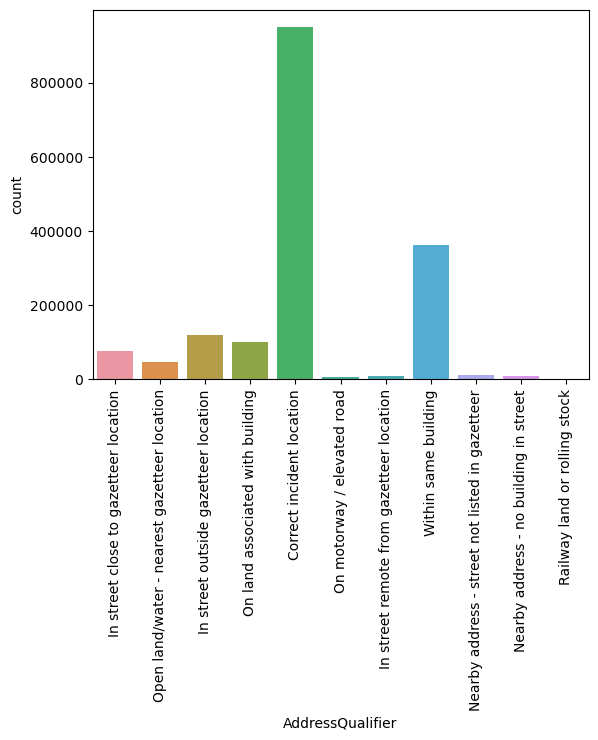

**Postcode_district--------------------------------- ['SW11' 'SE1' 'N9' 'UB10' 'N7' 'NW5' 'SE3' 'TW3' 'EC1V' 'WC1B' 'N21' 'SE5'
 'E8' 'EN2' 'EC1A' 'SE26' 'CR4' 'W10' 'N11' 'CR0' 'WC2R' 'SE18' 'N1' 'E6'
 'SE17' 'EC4A' 'SW8' 'SW16' 'IG6' 'E3' 'SW2' 'E17' 'SE8' 'WC2N' 'CR9'
 'NW6' 'TW11' 'E9' 'N12' 'W2' 'N6' 'DA5' 'EC1M' 'WC1H' 'SW20' 'NW2' 'SE9'
 'KT1' 'SW9' 'RM8' 'E15' 'E1' 'SE20' 'EN5' 'N3' 'SE19' 'IG1' 'WC2B' 'EC1R'
 'W9' 'E10' 'UB3' 'HA9' 'W11' 'N16' 'SW14' 'EN1' 'SE25' 'TW1' 'N15' 'W14'
 'IG11' 'W1H' 'NW3' 'EN3' 'SE7' 'BR5' 'DA17' 'E13' 'SE23' 'RM3' 'HA6' 'E2'
 'W5' 'HA8' 'CR2' 'E18' 'E4' 'KT6' 'N17' 'SW15' 'IG2' 'RM10' 'UB6' 'N13'
 'BR3' 'SE16' 'CR8' 'E11' 'W6' 'TW6' 'W12' 'UB5' 'UB4' 'SE28' 'SW13' 'E14'
 'TW13' 'BR1' 'W1J' 'RM1' 'KT2' 'WC1V' 'SW1V' 'SW19' 'W1C' 'SM4' 'EC2A'
 'SM2' 'W7' 'NW8' 'SE15' 'SW4' 'HA5' 'RM14' 'E16' 'SW3' 'WC2H' 'HA7' 'TW4'
 'NW9' 'WC1N' 'N22' 'NW1' 'SW6' 'IG7' 'HA2' 'NW7' 'SE22' 'SE21' 'SE13'
 'SE6' 'W3' 'TW12' 'N8' 'N4' 'TW14' 'E7' 'NW10' 'SE4' 'W1U' 'SE27' 'SM1'
 'SE14' 'RM6' 'SW18' 'SW12' 'N19' 'DA8' 'E5' 'RM7' 'TW9' 'SW7' 'SW1P'
 'SE2' 'HA1' 'W15' 'SW5' 'UB1' 'SE11' 'UB2' 'IG8' 'HA0' 'NW4' 'SW1E'
 'SW1A' 'E1W' 'EC3A' 'HA3' 'SM5' 'N10' 'WC2E' 'RM13' 'BR2' 'IG3' 'DA14'
 'SW17' 'SW1W' 'UB9' 'UB8' 'SE12' 'UB7' 'DA6' 'W4' 'W1T' 'RM11' 'EC1N'
 'N18' 'SM6' 'W1F' 'RM12' 'IG5' 'SW1X' 'DA18' 'TW8' 'BR4' 'SE24' 'NW11'
 'CR5' 'N2' 'EC2V' 'SE10' 'TW10' 'TW2' 'RM9' 'W8' 'TN16' 'W1D' 'CR7'
 'EC3R' 'SW1Y' 'EC2Y' 'EN4' 'E12' 'HA4' 'KT9' 'W13' 'W1G' 'W1K' 'N20' 'N5'
 'DA15' 'TW5' 'TW7' 'EC3N' 'W1X' 'KT3' 'DA1' 'RM4' 'KT5' 'DA16' 'N14'
 'DA7' 'WC1E' 'BR6' 'IG4' 'EC1Y' 'W1S' 'EC3V' 'SM3' 'WC2A' 'W1W' 'SW1H'
 'SW10' 'WC1X' 'EC4Y' 'EC4R' 'EC2N' 'KT4' 'EC2M' 'RM5' 'EC2R' 'W1B' 'EC4V'
 'EC4M' 'EC4N' 'BR7' 'UB11' 'RM2' 'EC3M' 'WC1R' 'KT8' 'WC1A' 'IG9' 'WC14'
 'EN7' 'W1A' 'W1V' 'EN8' 'TW15' 'EC2P' 'WD3' 'TN14' 'EC3P' 'EN6' 'CR3'
 'TW19' 'EC47' 'W1N' 'W16' 'WC2' 'BR8' 'CM13' 'EC1' 'SM7' 'N1C' 'CR6'
 'KT17' 'W17' 'KT22' 'E4A' 'KT18' 'EC17' 'CM14' 'KT19' 'SW99' 'RM15' 'EN9'
 'E98' 'RM16' 'W1M' 'W1' 'EC2' 'E20' 'EC1P' 'WD23' 'W1P' 'WD6' 'CR44'
 'SE1P' 'E77' 'SL3' 'WD19' 'SL0' 'TW16' 'RM19' 'EC4B' 'BF1' 'OX9']**

Postcode_district
CR0     1.952039e-02
SE1     1.660202e-02
E1      1.540595e-02
NW1     1.430269e-02
E14     1.379009e-02
            ...     
RM16    5.912402e-07
EC17    5.912402e-07
W16     5.912402e-07
WC14    5.912402e-07
OX9     5.912402e-07
Name: proportion, Length: 329, dtype: float64

**IncGeo_BoroughCode-------------------------------- ['E09000032' 'E09000022' 'E09000010' 'E09000017' 'E09000019' 'E09000007'
 'E09000011' 'E09000018' 'E09000028' 'E09000012' 'E09000001' 'E09000006'
 'E09000024' 'E09000020' 'E09000029' 'E09000025' 'E09000026' 'E09000030'
 'E09000031' 'E09000023' 'E09000033' 'E09000008' 'E09000027' 'E09000003'
 'E09000005' 'E09000014' 'E09000004' 'E09000002' 'E09000013' 'E09000016'
 'E09000009' 'E09000021' 'E09000015']**

IncGeo_BoroughCode
E09000033    0.073781
E09000007    0.048965
E09000028    0.045844
E09000030    0.045516
E09000022    0.042729
E09000012    0.039812
E09000008    0.037822
E09000023    0.034706
E09000009    0.033384
E09000025    0.033243
E09000003    0.033125
E09000019    0.032571
E09000017    0.032159
E09000020    0.031916
E09000010    0.030958
E09000032    0.030908
E09000011    0.029810
E09000005    0.029733
E09000006    0.028226
E09000013    0.028098
E09000014    0.027823
E09000031    0.026913
E09000018    0.025280
E09000026    0.022880
E09000016    0.021282
E09000004    0.020230
E09000002    0.020207
E09000015    0.017531
E09000024    0.016860
E09000029    0.016432
E09000027    0.015896
E09000021    0.014365
E09000001    0.010997
Name: proportion, dtype: float64

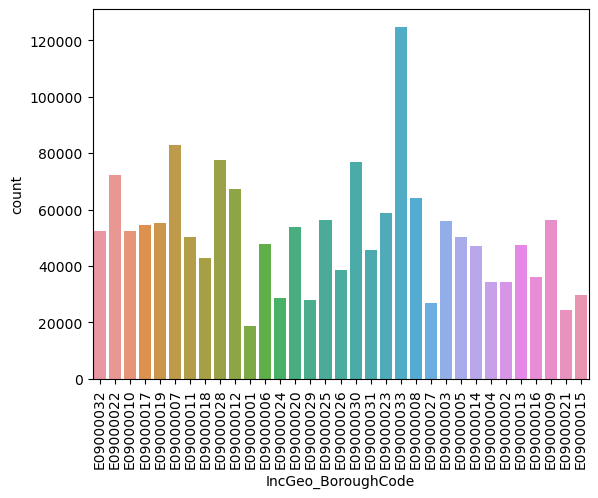

**IncGeo_BoroughName-------------------------------- ['WANDSWORTH' 'LAMBETH' 'ENFIELD' 'HILLINGDON' 'ISLINGTON' 'CAMDEN'
 'GREENWICH' 'HOUNSLOW' 'SOUTHWARK' 'HACKNEY' 'CITY OF LONDON' 'BROMLEY'
 'MERTON' 'KENSINGTON AND CHELSEA' 'SUTTON' 'NEWHAM' 'REDBRIDGE'
 'TOWER HAMLETS' 'WALTHAM FOREST' 'LEWISHAM' 'WESTMINSTER' 'CROYDON'
 'RICHMOND UPON THAMES' 'BARNET' 'BRENT' 'HARINGEY' 'BEXLEY'
 'BARKING AND DAGENHAM' 'HAMMERSMITH AND FULHAM' 'HAVERING' 'EALING'
 'KINGSTON UPON THAMES' 'HARROW']**

IncGeo_BoroughName
WESTMINSTER               0.073781
CAMDEN                    0.048965
SOUTHWARK                 0.045844
TOWER HAMLETS             0.045516
LAMBETH                   0.042729
HACKNEY                   0.039812
CROYDON                   0.037822
LEWISHAM                  0.034706
EALING                    0.033384
NEWHAM                    0.033243
BARNET                    0.033125
ISLINGTON                 0.032571
HILLINGDON                0.032159
KENSINGTON AND CHELSEA    0.031916
ENFIELD                   0.030958
WANDSWORTH                0.030908
GREENWICH                 0.029810
BRENT                     0.029733
BROMLEY                   0.028226
HAMMERSMITH AND FULHAM    0.028098
HARINGEY                  0.027823
WALTHAM FOREST            0.026913
HOUNSLOW                  0.025280
REDBRIDGE                 0.022880
HAVERING                  0.021282
BEXLEY                    0.020230
BARKING AND DAGENHAM      0.020207
HARROW                    0.017531
M

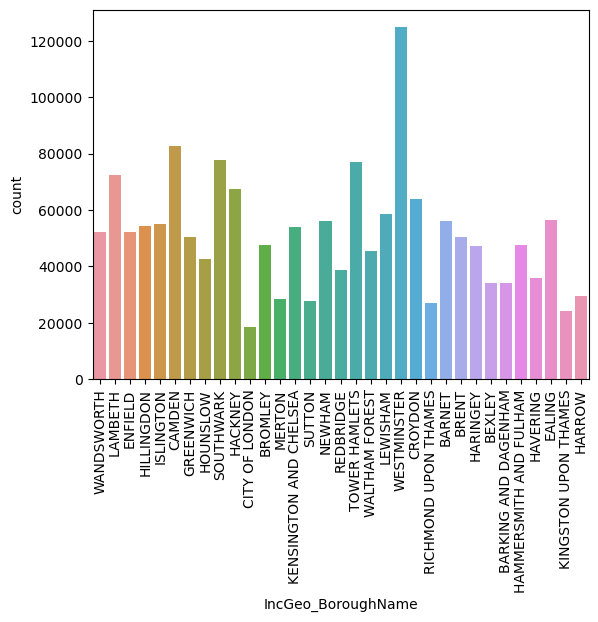

**FRS----------------------------------------------- ['London']**

FRS
London    1.0
Name: proportion, dtype: float64

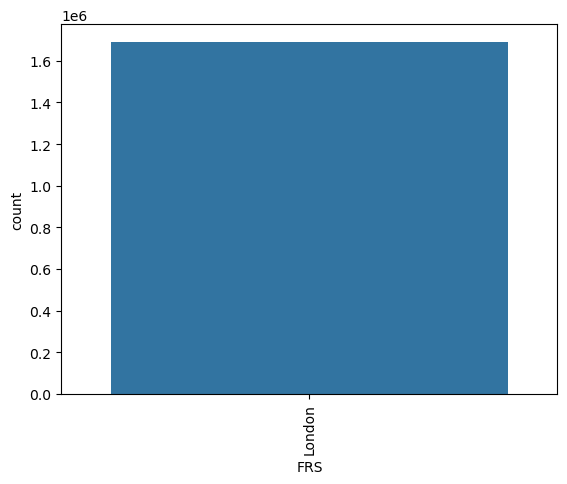

**IncidentStationGround----------------------------- ['Battersea' 'Lambeth' 'Edmonton' 'Hillingdon' 'Holloway' 'Kentish Town'
 'Lee Green' 'Heston' 'Shoreditch' 'Soho' 'Southgate' 'Peckham' 'Homerton'
 'Enfield' 'Dowgate' 'Beckenham' 'Mitcham' 'North Kensington' 'Wallington'
 'Plumstead' 'Euston' 'East Ham' 'Old Kent Road' 'Brixton' 'Tooting'
 'Hainault' 'Poplar' 'West Norwood' 'Walthamstow' 'Greenwich' 'Croydon'
 'West Hampstead' 'Norbury' 'Twickenham' 'Finchley' 'Paddington'
 'Deptford' 'Hornsey' 'Bexley' 'New Malden' 'Willesden' 'Eltham'
 'Dagenham' 'Stratford' 'Bethnal Green' 'Barnet' 'Addington' 'Ilford'
 'East Greenwich' 'Islington' 'Leyton' 'Hayes' 'Wembley' 'Stoke Newington'
 'Richmond' 'Woodside' 'Tottenham' 'Hammersmith' 'Barking' 'Orpington'
 'Erith' 'Plaistow' 'New Cross' 'Harold Hill' 'Ruislip' 'Ealing'
 'Mill Hill' 'Heathrow' 'Woodford' 'Surbiton' 'Wandsworth' 'Northolt'
 'Purley' 'Clapham' 'Leytonstone' 'Kensington' 'Stanmore' 'Southall'
 'Dockhead' 'Feltham' 'Bromley' 'Romford' 'Kingston' 'Wimbledon'
 'Forest Hill' 'Whitechapel' 'Sutton' 'Harrow' 'Hornchurch' 'Chelsea'
 'Millwall' 'Fulham' 'Acton' 'Lewisham' 'Park Royal' 'Shadwell' 'Hendon'
 'Chingford' 'Wennington' 'Biggin Hill' 'Sidcup' 'Chiswick'
 'Beyond Home Counties']**

IncidentStationGround
Soho                    3.558024e-02
Paddington              2.307433e-02
Euston                  2.287035e-02
Lambeth                 2.082111e-02
Shoreditch              1.889604e-02
                            ...     
Millwall                4.099659e-03
Hainault                3.744915e-03
Wennington              3.258325e-03
Biggin Hill             1.455042e-03
Beyond Home Counties    5.912402e-07
Name: proportion, Length: 103, dtype: float64

In [39]:
for col in categorical_features:
    printmd(f'**{col :-<50} {incidents_df[col].unique()}**')
    display(incidents_df[col].value_counts(normalize=True))
    if(incidents_df[col].nunique() <= 34):
        #plt.figure(figsize=(10,8))
        sns.countplot(x=col, data=incidents_df)
        plt.xticks(rotation=90)
        plt.show()

**Variable DateOfCall**

In [40]:
print()

print("Date la plus ancienne :", incidents_df['DateOfCall'].min(), end="\n\n")

print("Date la plus récente :", incidents_df['DateOfCall'].max())


Date la plus ancienne : 2009-01-01 00:00:00

Date la plus récente : 2024-03-31 00:00:00


**Variable TimeOfCall**

In [41]:
print()

print("Date la plus ancienne :", incidents_df['TimeOfCall'].min().time() , end="\n\n")

print("Date la plus récente :", incidents_df['TimeOfCall'].max().time() )


Date la plus ancienne : 00:00:00

Date la plus récente : 23:59:59


#### **2.2.3 Variables continues**

In [42]:
def analyse_variable_quantitative(variable, base):

    print()

    print("Statistiques de la variable: ",variable , end="\n\n")

    print(base[variable].describe(), end="\n\n")

    sns.boxplot(x=variable, data=base)

    plt.title(f'Distribution de {variable} \n', fontsize=20)

    plt.show()


Statistiques de la variable:  CalYear

count    1.691360e+06
mean     2.016099e+03
std      4.590806e+00
min      2.009000e+03
25%      2.012000e+03
50%      2.016000e+03
75%      2.020000e+03
max      2.024000e+03
Name: CalYear, dtype: float64



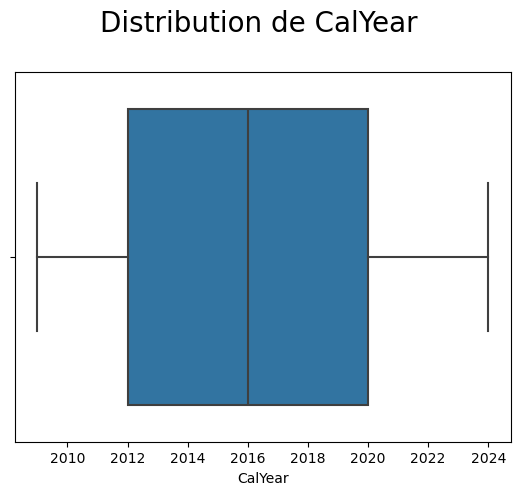


Statistiques de la variable:  HourOfCall

count    1.691360e+06
mean     1.347415e+01
std      6.246800e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.400000e+01
75%      1.900000e+01
max      2.300000e+01
Name: HourOfCall, dtype: float64



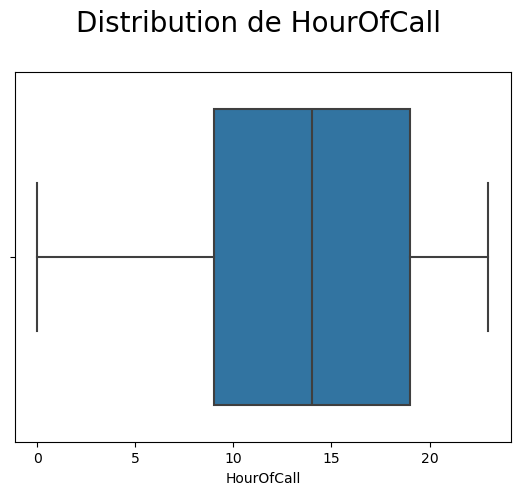


Statistiques de la variable:  Easting_rounded

count    1.691360e+06
mean     5.306637e+05
std      9.721261e+03
min      5.035500e+05
25%      5.252500e+05
50%      5.309500e+05
75%      5.362500e+05
max      6.111500e+05
Name: Easting_rounded, dtype: float64



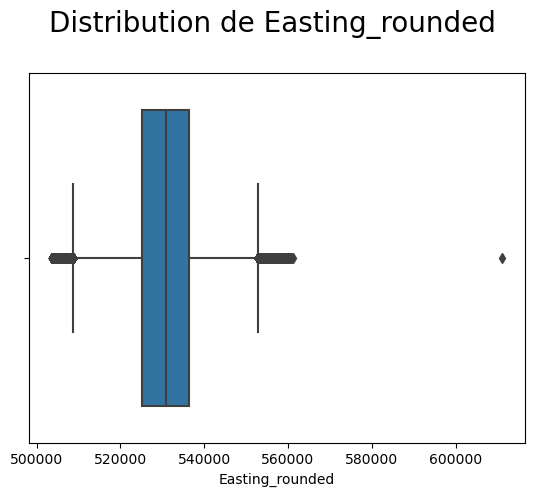


Statistiques de la variable:  Northing_rounded

count    1.691360e+06
mean     1.804959e+05
std      7.355623e+03
min      1.559500e+05
25%      1.761500e+05
50%      1.810500e+05
75%      1.851500e+05
max      3.024500e+05
Name: Northing_rounded, dtype: float64



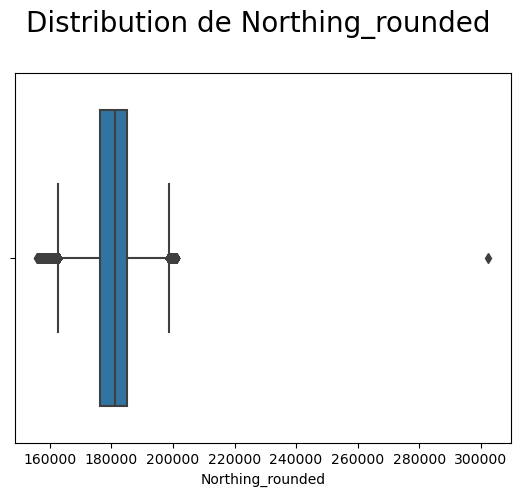


Statistiques de la variable:  FirstPumpArriving_AttendanceTime

count    1.691360e+06
mean     3.163317e+02
std      1.334618e+02
min      1.000000e+00
25%      2.360000e+02
50%      2.960000e+02
75%      3.690000e+02
max      1.200000e+03
Name: FirstPumpArriving_AttendanceTime, dtype: float64



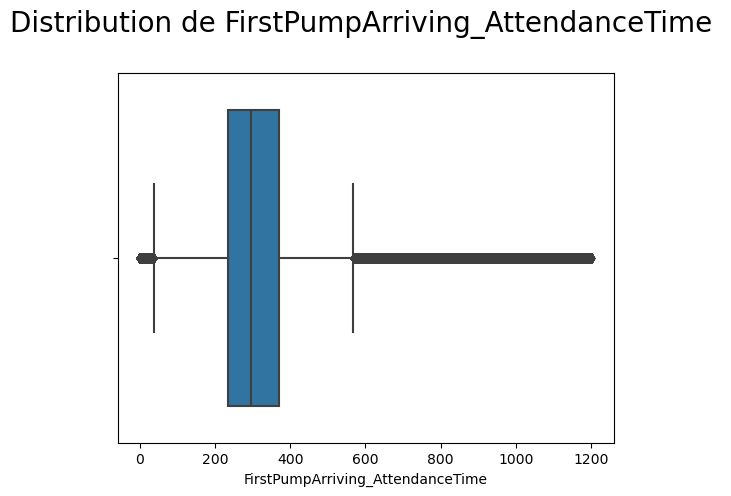


Statistiques de la variable:  NumStationsWithPumpsAttending

count    1.691360e+06
mean     1.364330e+00
std      6.755773e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.600000e+01
Name: NumStationsWithPumpsAttending, dtype: float64



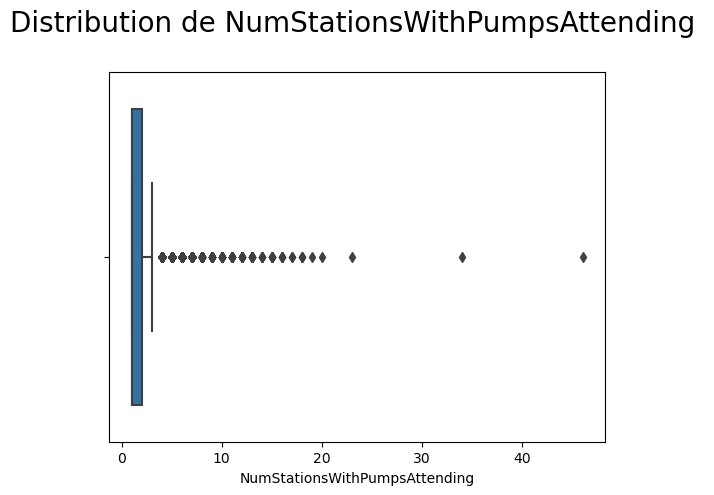


Statistiques de la variable:  NumPumpsAttending

count    1.691360e+06
mean     1.550219e+00
std      8.353861e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.060000e+02
Name: NumPumpsAttending, dtype: float64



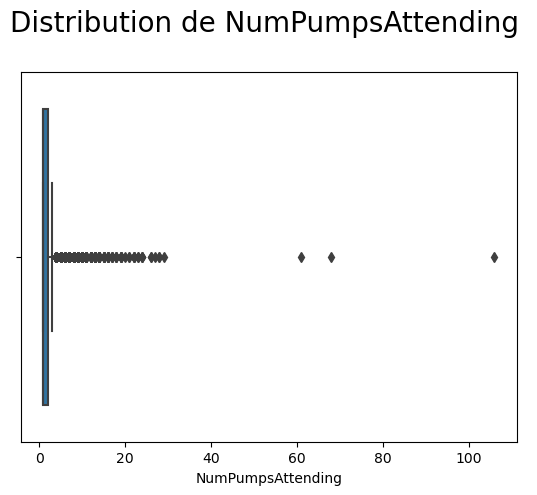


Statistiques de la variable:  PumpCount

count    1.691360e+06
mean     1.591759e+00
std      1.588199e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.510000e+02
Name: PumpCount, dtype: float64



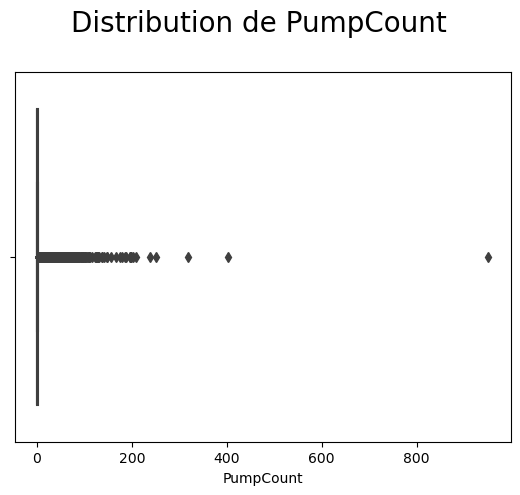


Statistiques de la variable:  PumpMinutesRounded

count    1.691360e+06
mean     7.632329e+01
std      5.765350e+02
min      6.000000e+01
25%      6.000000e+01
50%      6.000000e+01
75%      6.000000e+01
max      5.256290e+05
Name: PumpMinutesRounded, dtype: float64



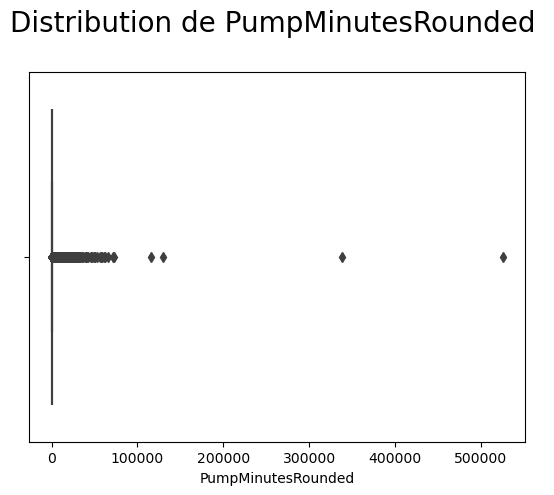


Statistiques de la variable:  Notional Cost (£)

count    1.691360e+06
mean     3.974396e+02
std      2.724156e+03
min      2.550000e+02
25%      2.600000e+02
50%      3.280000e+02
75%      3.520000e+02
max      2.277726e+06
Name: Notional Cost (£), dtype: float64



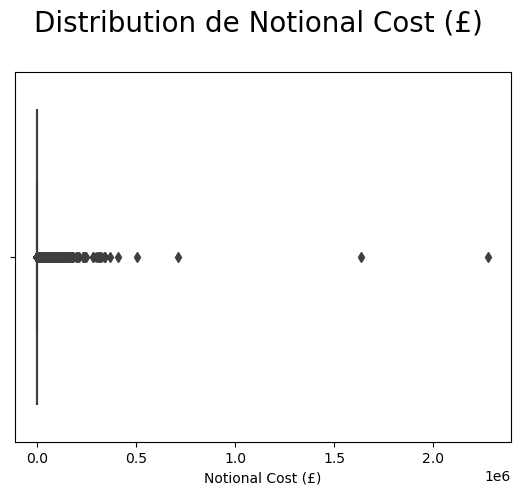


Statistiques de la variable:  NumCalls

count    1.691360e+06
mean     1.330506e+00
std      1.489110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.690000e+02
Name: NumCalls, dtype: float64



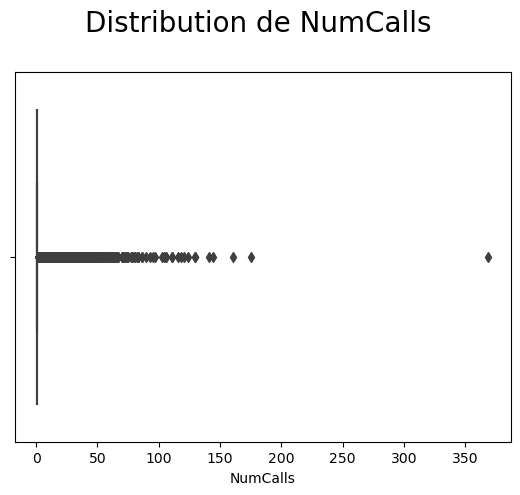

In [43]:
numeric_features = list(incidents_df.select_dtypes(include=np.number).columns)
for col in numeric_features:
    analyse_variable_quantitative(col, incidents_df)

#### **2.2.4 Check des outliers**

In [44]:
def verfier_les_outliers(data, plot=True):
    # calculate summary statistics for the Notional Cost column
    summary = data.describe()
    #display(summary)

    # calculate interquartile range for the column
    q1 = summary.loc['25%']
    q3 = summary.loc['75%']
    iqr = q3 - q1

    # identify potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound))
    #print(type(lower_bound))
    #print(upper_bound)

    # calculate the number and percentage of outliers
    num_outliers = outliers.sum()

    #print(f"Number of outliers:\n{num_outliers}")
    print(f"Number of outliers:\n{pd.concat([num_outliers,lower_bound,upper_bound],axis=1)}")

In [45]:
verfier_les_outliers(incidents_df[numeric_features])

Number of outliers:
                                       0         1         2
CalYear                                0    2000.0    2032.0
HourOfCall                             0      -6.0      34.0
Easting_rounded                    51074  508750.0  552750.0
Northing_rounded                   19145  162650.0  198650.0
FirstPumpArriving_AttendanceTime   90853      36.5     568.5
NumStationsWithPumpsAttending      30135      -0.5       3.5
NumPumpsAttending                  49962      -0.5       3.5
PumpCount                          58222      -0.5       3.5
PumpMinutesRounded                210550      60.0      60.0
Notional Cost (£)                 109690     122.0     490.0
NumCalls                          293256       1.0       1.0


In [46]:
outlier_columns = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount','PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls']

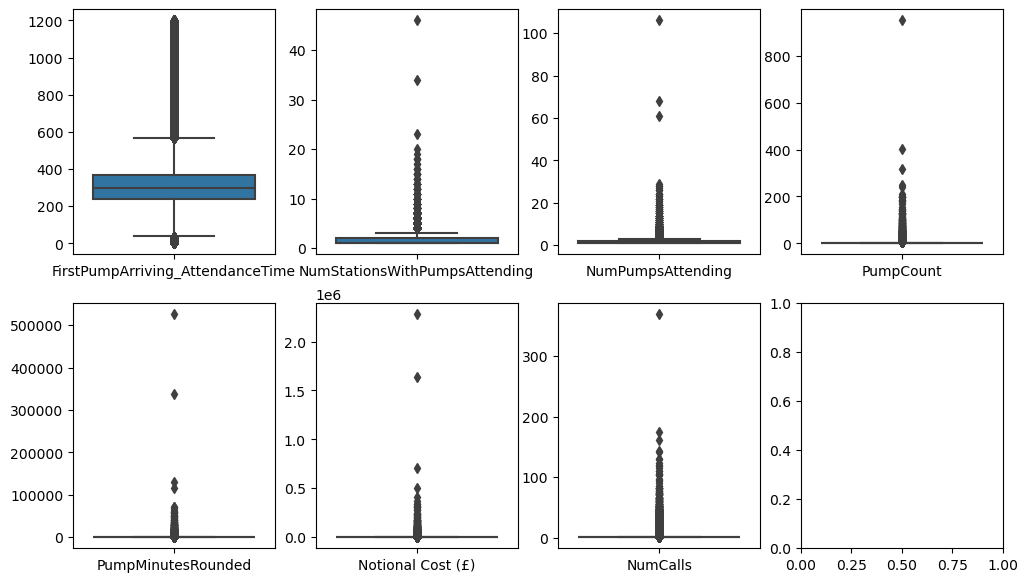

In [47]:
fig,ax = plt.subplots(2,4,figsize=(12,7))
row = col = 0
for index,col_name in enumerate(outlier_columns):
    if (index%4 == 0) & (index > 0):
        row += 1
        col = 0
    sns.boxplot(data=incidents_df[[col_name]], orient="x",ax=ax[row,col])
    col += 1

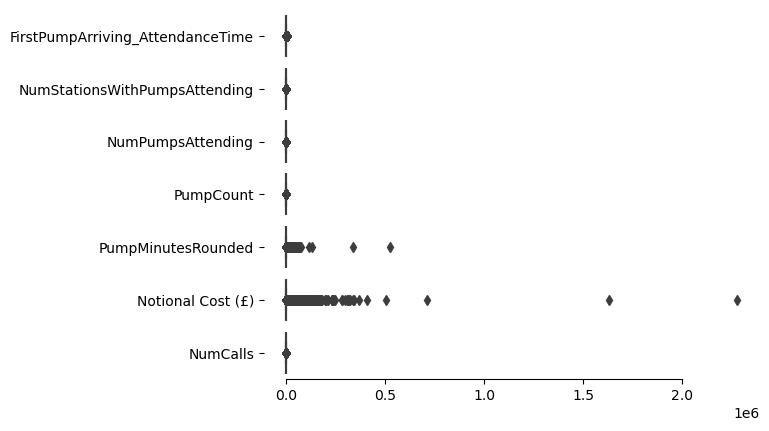

In [48]:
#sns.set_theme(style="ticks")
ax = sns.boxplot(data=incidents_df[outlier_columns], orient="h")
sns.despine(trim=True, left=True)
plt.show()

#### **2.2.5 Supprimer les outliers**

**Questions  à poser, doute sur comment enlever les outliers **

- FirstPumpArriving_AttendanceTime
- PumpCount                          58222      -0.5       3.5
-PumpMinutesRounded                210550      60.0      60.0
- Notional Cost (£)                 109690     122.0     490.0
- NumCalls                          293256       1.0       1.0

In [49]:
fpat_median =incidents_df['FirstPumpArriving_AttendanceTime'].median()
#incidents_df["FirstPumpArriving_AttendanceTime"] = np.where((incidents_df['FirstPumpArriving_AttendanceTime'] > 567) | (incidents_df['FirstPumpArriving_AttendanceTime'] < 36.5), fpat_median,incidents_df['Age'])
incidents_df["FirstPumpArriving_AttendanceTime"] = incidents_df["FirstPumpArriving_AttendanceTime"].mask((incidents_df['FirstPumpArriving_AttendanceTime'] > 567) | (incidents_df['FirstPumpArriving_AttendanceTime'] < 36.5), fpat_median)

#### **2.2.5 Relations variables catégorielles/Target**

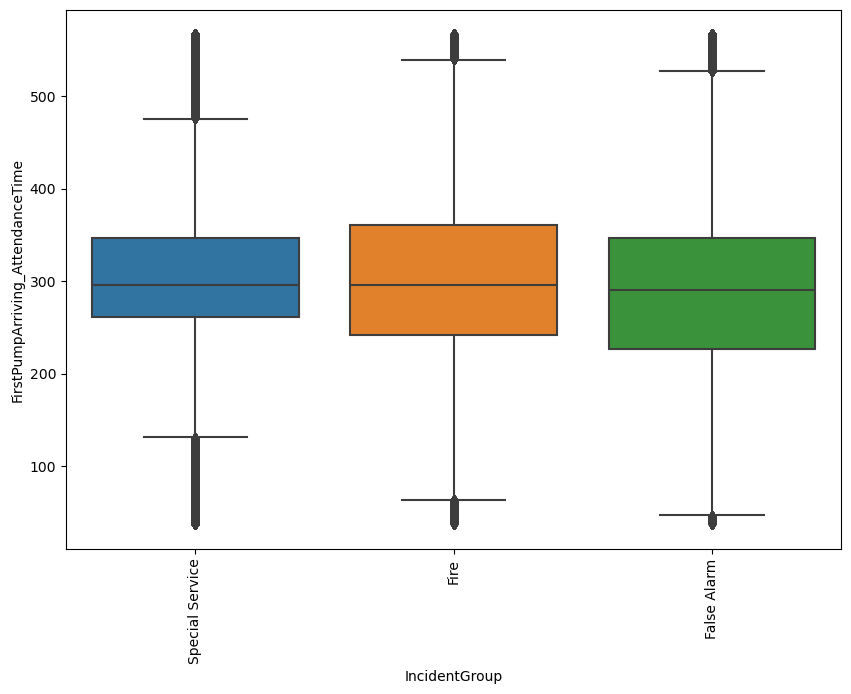

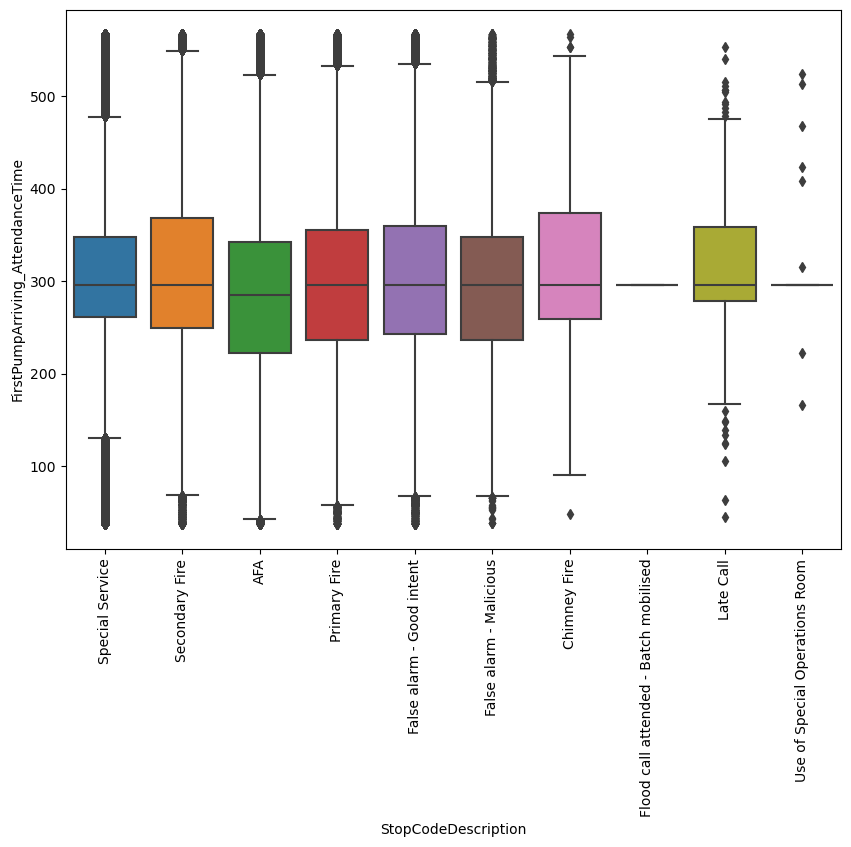

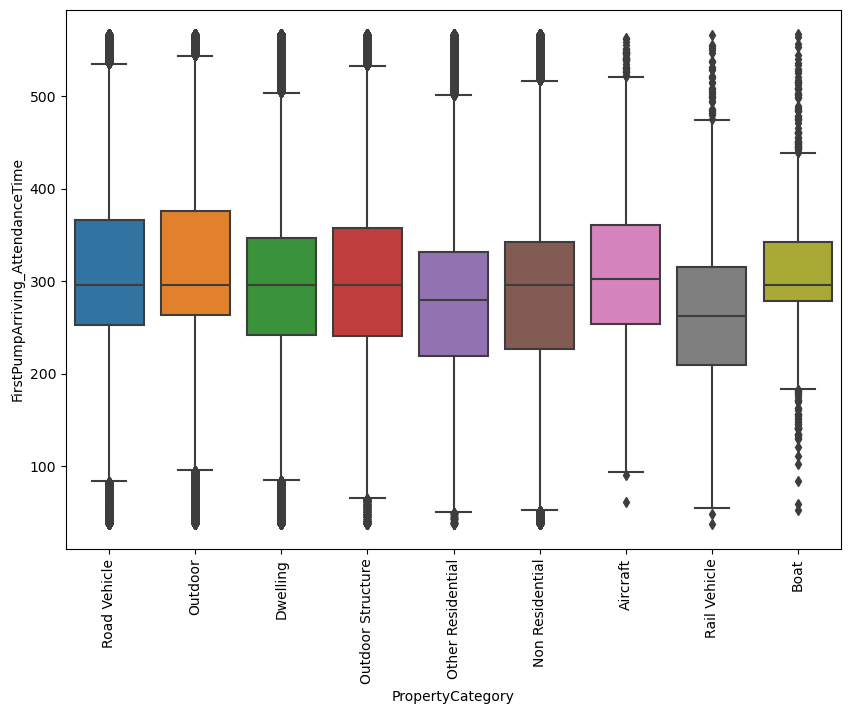

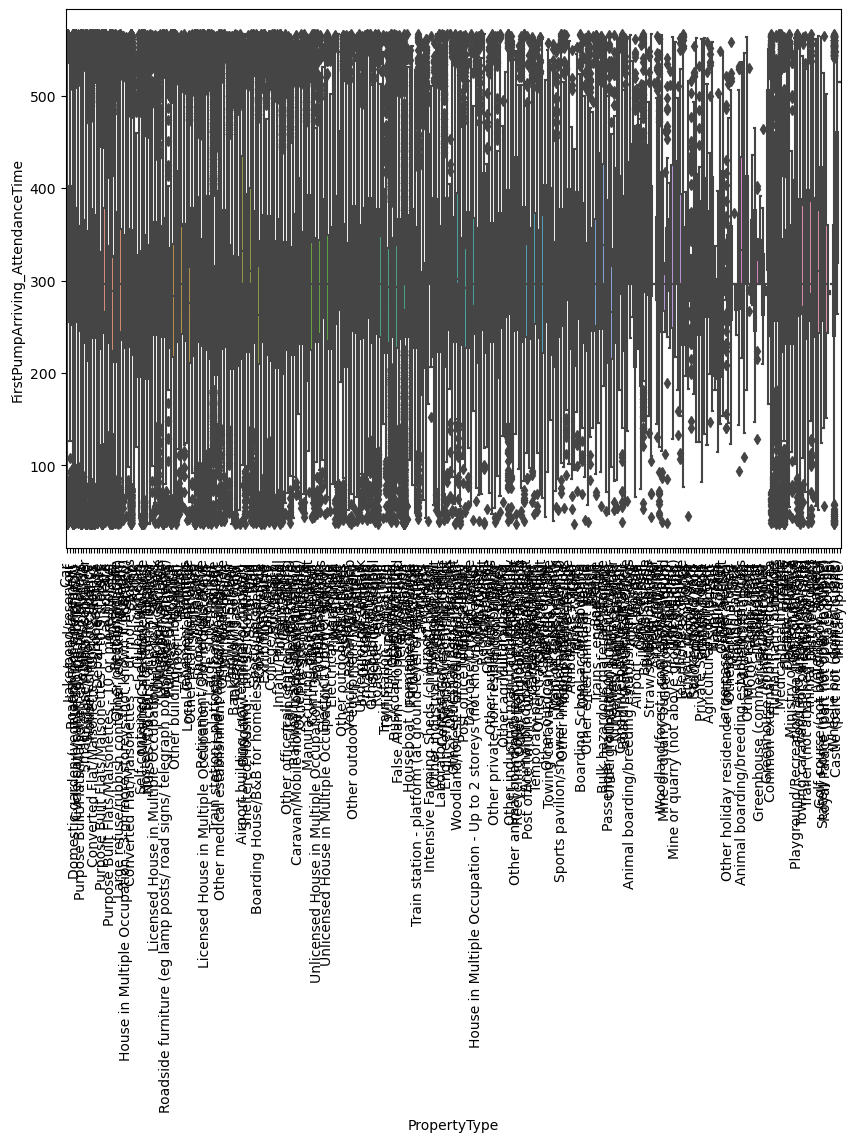

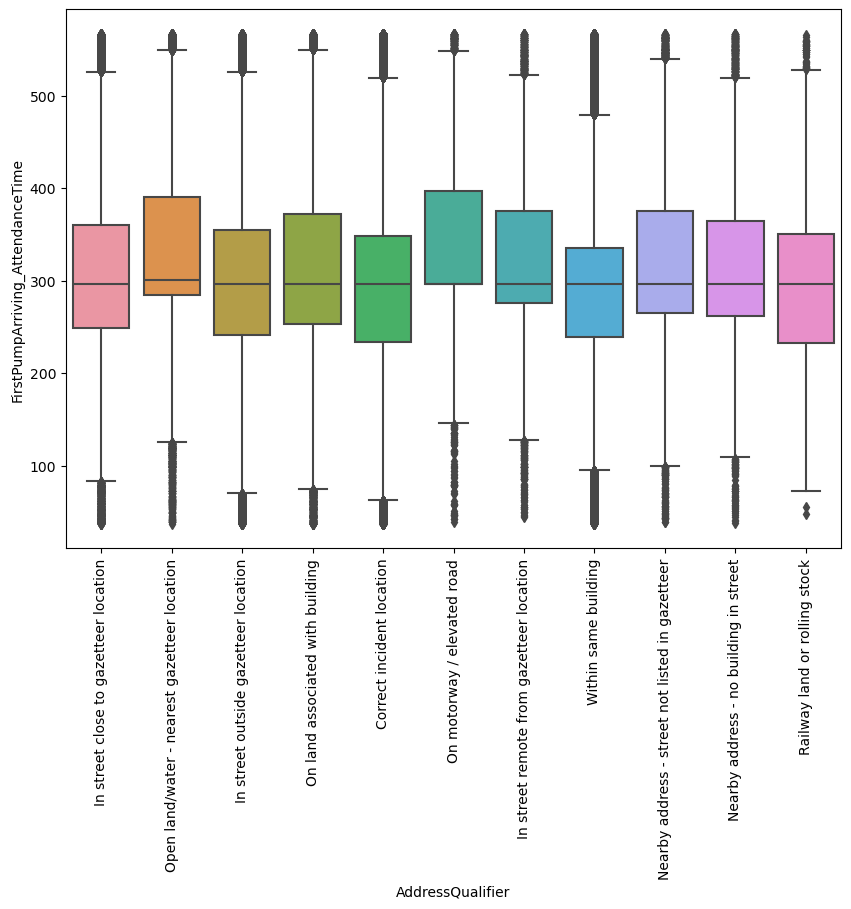

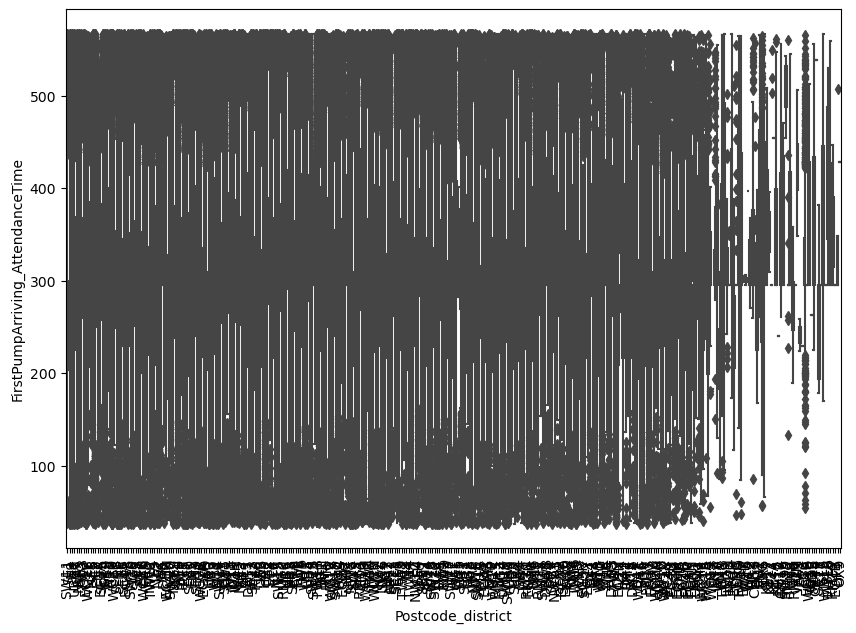

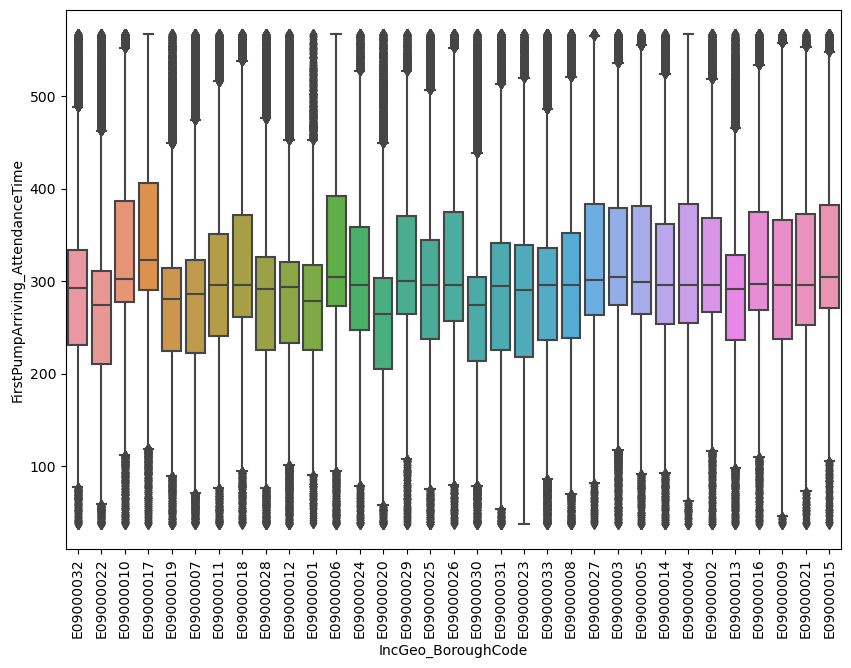

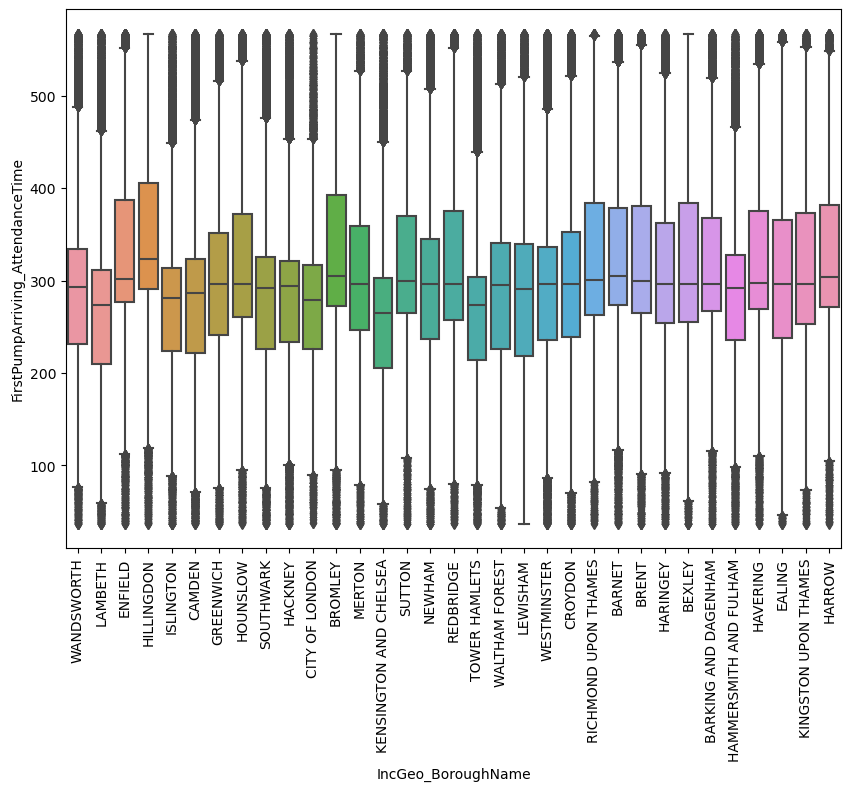

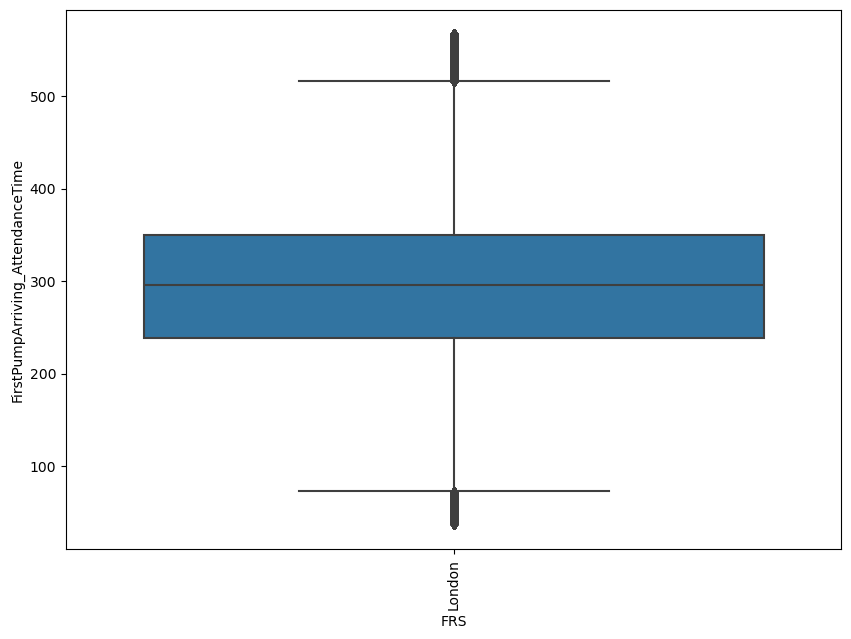

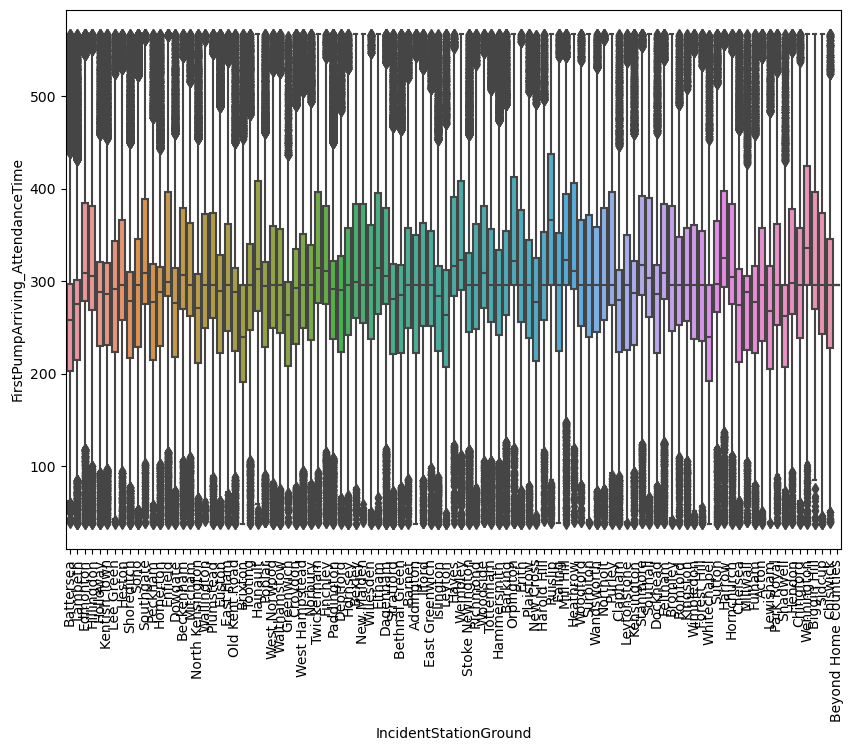

In [50]:
for col in categorical_features:
    plt.figure(figsize=(10,7))
    #sns.heatmap(pd.crosstab(incidents_df['FirstPumpArriving_AttendanceTime'], incidents_df[col]), annot=True, fmt='d')
    sns.boxplot(x=incidents_df[col],y=incidents_df['FirstPumpArriving_AttendanceTime'])
    plt.xticks(rotation=90)
    plt.show()

#### **2.2.6 Relations variables continues/Target**

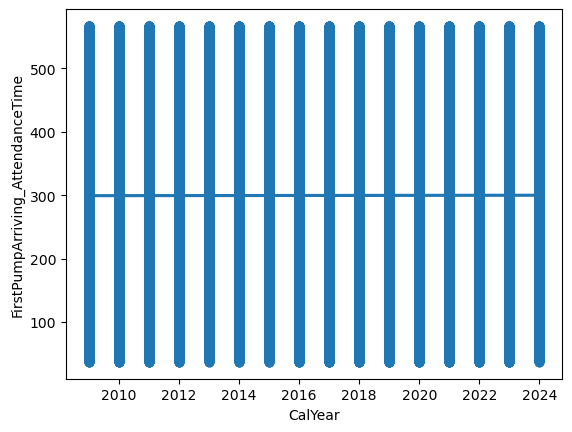

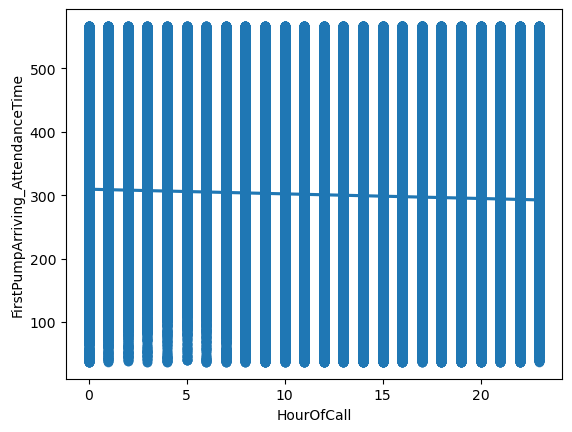

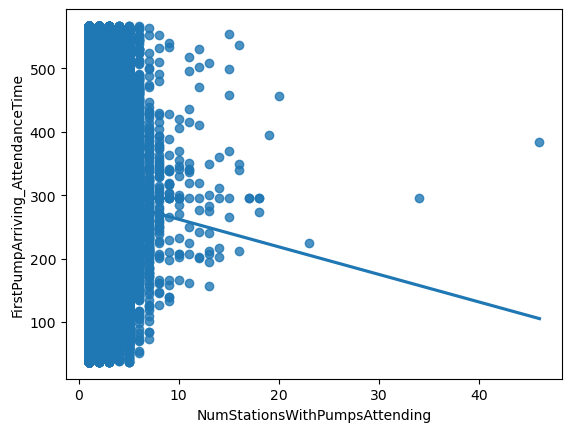

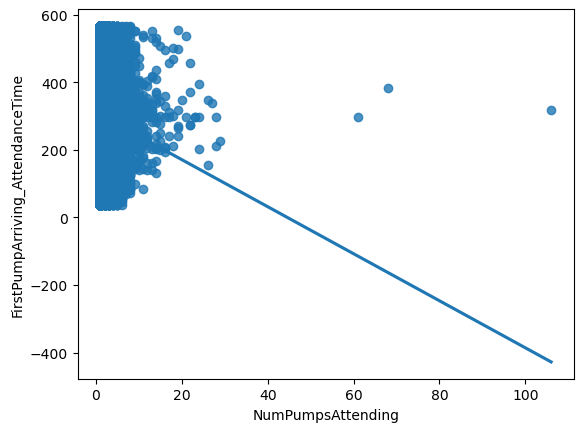

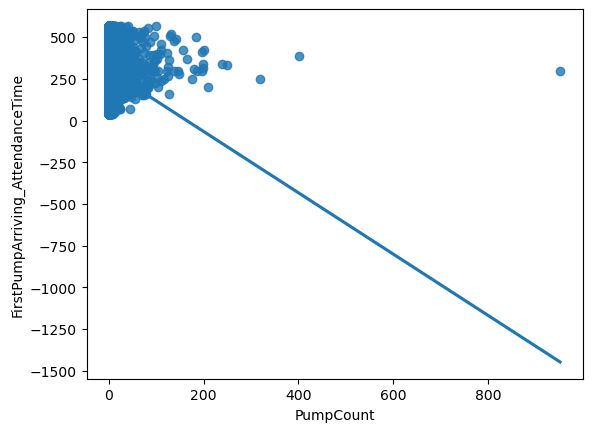

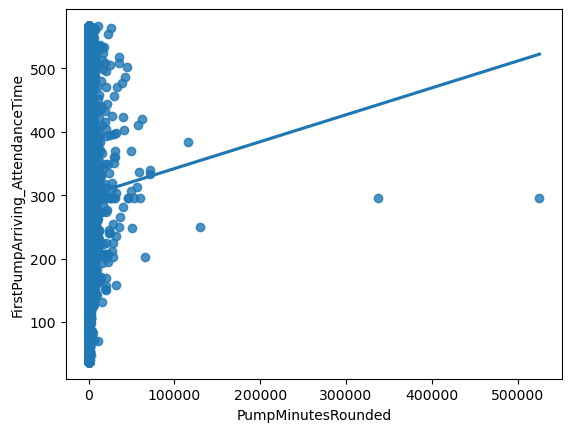

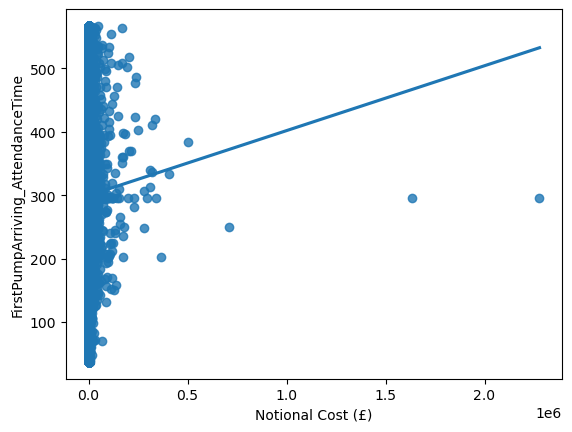

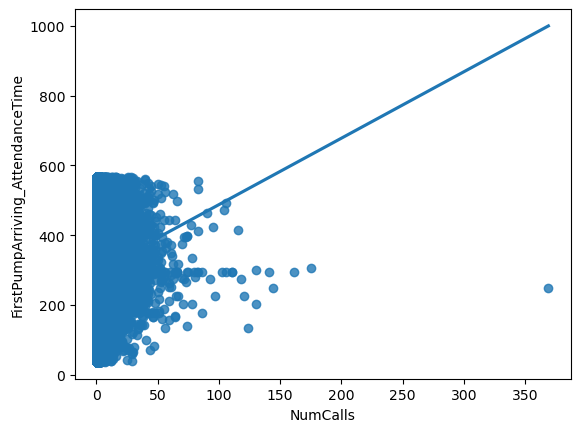

In [51]:
numeric_features_to_display = ['CalYear','HourOfCall','NumStationsWithPumpsAttending','NumPumpsAttending','PumpCount','PumpMinutesRounded','Notional Cost (£)','NumCalls']
#  'CalYear','HourOfCall','FirstPumpArriving_AttendanceTime',

#fig,ax = plt.subplots(2,4,figsize=(20,7))
row = col = 0
for index,col_name in enumerate(numeric_features_to_display):
    
    if (index%4 == 0) & (index > 0):
        row += 1
        col = 0
    # sns.regplot(x=col_name,y="FirstPumpArriving_AttendanceTime",data=incidents_df,ax=ax[row,col],ci=None)
    col += 1
    #plt.show()

for index,col_name in enumerate(numeric_features_to_display):
    sns.regplot(x=col_name,y="FirstPumpArriving_AttendanceTime",data=incidents_df,ci=None)
    plt.show()

#### **2.2.7 Target distribution**

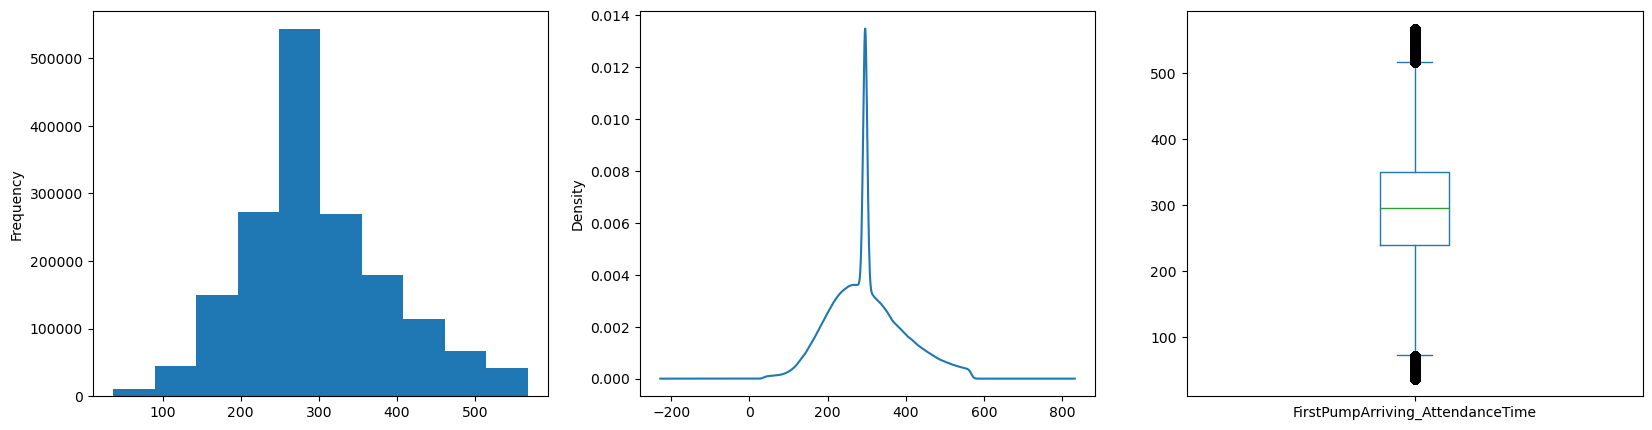

In [52]:
target = 'FirstPumpArriving_AttendanceTime'
fig,ax = plt.subplots(1,3,figsize=(20,5))
incidents_df[target].plot(kind="hist",ax=ax[0])
incidents_df[target].plot(kind="kde",ax=ax[1])
incidents_df[target].plot(kind="box",ax=ax[2])
plt.show()

In [53]:
from scipy import stats
from scipy.stats import normaltest

#print(f'{target}: {"Not Gaussian" if normaltest(incidents_df[target].values,)[1]<0.05 else "Gaussian"}  {normaltest(incidents_df[target].values)}')

In [54]:
# sns.pairplot(incidents_df[numeric_features])
numeric_features

['CalYear',
 'HourOfCall',
 'Easting_rounded',
 'Northing_rounded',
 'FirstPumpArriving_AttendanceTime',
 'NumStationsWithPumpsAttending',
 'NumPumpsAttending',
 'PumpCount',
 'PumpMinutesRounded',
 'Notional Cost (£)',
 'NumCalls']

<Axes: >

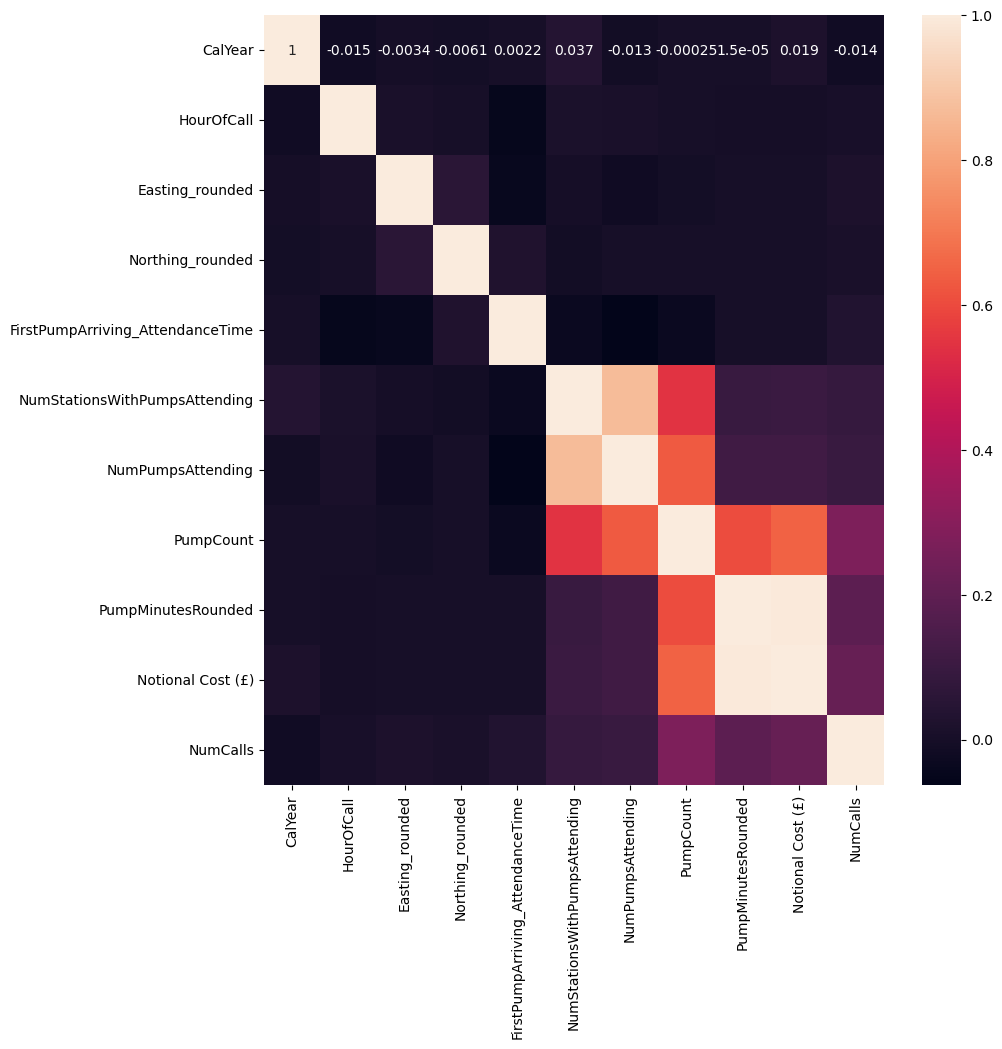

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_features_to_display = ['FirstPumpArriving_AttendanceTime','NumStationsWithPumpsAttending','NumPumpsAttending','PumpCount','PumpMinutesRounded','Notional Cost (£)','NumCalls']
corrmat = incidents_df[numeric_features].corr()
#mask= np.zeros_like(corrmat)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,
            #vmax=1, vmin=-1,
            annot=True, 
            #annot_kws={'fontsize':7},
            #mask=mask,
            #cmap=sns.diverging_palette(20,220,as_cmap=True)
            )

In [56]:
plt.figure(figsize=(8,8))
incidents_df[numeric_features].corr().style.background_gradient(cmap='coolwarm')

,CalYear,HourOfCall,Easting_rounded,Northing_rounded,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
CalYear,1.000000,-0.014718,-0.003355,-0.006118,0.002215,0.037101,-0.012846,-0.000246,0.000015,0.019305,-0.013834
HourOfCall,-0.014718,1.000000,0.010132,0.001331,-0.049553,0.013518,0.009155,0.002077,-0.002559,-0.003022,0.006803
Easting_rounded,-0.003355,0.010132,1.000000,0.054487,-0.040007,-0.003284,-0.019715,-0.008115,0.001838,0.001919,0.018393
Northing_rounded,-0.006118,0.001331,0.054487,1.000000,0.027100,-0.011730,0.003357,0.002290,0.001828,0.001745,0.009306
FirstPumpArriving_AttendanceTime,0.002215,-0.049553,-0.040007,0.027100,1.000000,-0.031793,-0.062897,-0.031593,0.002644,0.003014,0.030660
NumStationsWithPumpsAttending,0.037101,0.013518,-0.003284,-0.011730,-0.031793,1.000000,0.868167,0.544487,0.096642,0.099911,0.088031
NumPumpsAttending,-0.012846,0.009155,-0.019715,0.003357,-0.062897,0.868167,1.000000,0.632805,0.117406,0.119609,0.095006
PumpCount,-0.000246,0.002077,-0.008115,0.002290,-0.031593,0.544487,0.632805,1.000000,0.603902,0.647740,0.277305
PumpMinutesRounded,0.000015,-0.002559,0.001838,0.001828,0.002644,0.096642,0.117406,0.603902,1.000000,0.993706,0.193749
Notional Cost (£),0.019305,-0.003022,0.001919,0.001745,0.003014,0.099911,0.119609,0.647740,0.993706,1.000000,0.217906


<Figure size 800x800 with 0 Axes>

In [57]:
#sns.heatmap(incidents_df[numeric_features].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(incidents_df[numeric_features].corr(method='pearson')),cbar=False)

In [58]:
#fig = plt.figure(figsize=(8,8))
#sns.heatmap(incidents_df[numeric_features].corr(method='kendall'),annot=True,fmt='.2f',mask=np.triu(incidents_df[numeric_features].corr(method='pearson')),cbar=False)

#### **2.2.8 Relations variables catégorielles/catégorielles**

In [59]:
# Faire test de CRAMER

#### **2.2.9 Relations variables continues/continues**

In [60]:
from scipy.stats import pearsonr

numeric_features_inner = numeric_features.copy()

for item_1 in numeric_features:
    for item_2 in numeric_features_inner:
        if (item_1 != item_2) :
            coefficient, p_value = pearsonr(incidents_df[item_1], incidents_df[item_2])
            print("Le coefficient entre les variables '", item_1, "' et '", item_2, "' est de :", coefficient, "et la p-value de", p_value)
    #numeric_features_inner.remove(item_1)

Le coefficient entre les variables ' CalYear ' et ' HourOfCall ' est de : -0.014718196017089704 et la p-value de 1.120452907817086e-81
Le coefficient entre les variables ' CalYear ' et ' Easting_rounded ' est de : -0.0033553402378148 et la p-value de 1.2787734257528827e-05
Le coefficient entre les variables ' CalYear ' et ' Northing_rounded ' est de : -0.006118162929335679 et la p-value de 1.7643165318858748e-15
Le coefficient entre les variables ' CalYear ' et ' FirstPumpArriving_AttendanceTime ' est de : 0.0022145047604565076 et la p-value de 0.0039765535010201514
Le coefficient entre les variables ' CalYear ' et ' NumStationsWithPumpsAttending ' est de : 0.03710137448604379 et la p-value de 0.0
Le coefficient entre les variables ' CalYear ' et ' NumPumpsAttending ' est de : -0.01284550657742882 et la p-value de 1.174298959108555e-62
Le coefficient entre les variables ' CalYear ' et ' PumpCount ' est de : -0.0002462472401432367 et la p-value de 0.748778852658005
Le coefficient entre 

#### **2.2.10 Relations variables continues/catégorielles**

In [61]:
# Faire test de ANOVA.

#### **2.2.11 Autres analyse**

TODO, Nbre d'incidents par an/mois/semaine etc, le temps reponse moyen par an etc...

#### 3 Lecture des données "Mobilisation"

In [62]:
## 1.1 Lecture des données "Mobilisation"


In [63]:
df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")

df1.sample(10)

C:\Users\courio\AppData\Local\Temp\ipykernel_19384\343694789.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2009 - 2017.csv")


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
188719,94055101.0,16-Jun-10,2010,00:11:01,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),Correct incident location,SW19 8HQ,SW19,4.802356e+07,22102232.0,E09000024,MERTON,Merton,E05013828,Wimbledon Park,Wimbledon Park,525845.0,171601.0,525850,171650,51.429448,-0.191149,London,Wimbledon,333.0,Wimbledon,NaN,NaN,1.0,1.0,1,60,260,1.0
591043,8503141.0,22-Jan-14,2014,10:25:29,10,False Alarm,AFA,NaN,Non Residential,Infant/Primary school,Correct incident location,N16 9EY,N16,1.000824e+10,20900258.0,E09000012,HACKNEY,Hackney,E05009369,Clissold,Clissold,532828.0,186086.0,532850,186050,51.558027,-0.085313,London,Stoke Newington,215.0,Stoke Newington,NaN,NaN,1.0,1.0,1,60,290,1.0
673081,158465141.0,25-Nov-14,2014,16:05:14,16,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,NaN,SW10,0.000000e+00,21700188.0,E09000020,KENSINGTON AND CHELSEA,Kensington And chelsea,E05009405,Stanley,Stanley,NaN,NaN,526750,178050,NaN,NaN,London,Chelsea,NaN,NaN,NaN,NaN,1.0,1.0,1,60,295,1.0
120972,210611091.0,21-Nov-09,2009,10:00:49,10,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,Open land/water - nearest gazetteer location,DA8 2BZ,DA8,NaN,NaN,E09000004,BEXLEY,Bexley,E05000079,North End,North End,551757.0,176830.0,551750,176850,51.470091,0.183559,London,Erith,322.0,Erith,337.0,Erith,1.0,2.0,2,60,260,2.0
597329,19544141.0,16-Feb-14,2014,02:15:09,2,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),In street close to gazetteer location,N4 2DE,N4,NaN,NaN,E09000012,HACKNEY,Hackney,E05009387,Woodberry Down,Woodberry Down,532090.0,187542.0,532050,187550,51.571285,-0.095406,London,Stoke Newington,356.0,Stoke Newington,NaN,NaN,1.0,1.0,1,60,290,1.0
424582,17242122.0,18-Jun-12,2012,15:46:08,15,Special Service,Special Service,Lift Release,Non Residential,Law Courts,Within same building,CR9 5AB,CR9,1.000229e+11,20500623.0,E09000008,CROYDON,Croydon,E05011463,Addiscombe West,Addiscombe West,532890.0,165536.0,532850,165550,51.373337,-0.092138,London,Croydon,239.0,Croydon,NaN,NaN,1.0,1.0,1,60,260,1.0
372804,205592111.0,24-Dec-11,2011,22:31:33,22,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,NaN,E17,0.000000e+00,22886450.0,E09000031,WALTHAM FOREST,Waltham Forest,E05013891,High Street,High Street,NaN,NaN,537050,189250,NaN,NaN,London,Walthamstow,434.0,Leyton,467.0,Walthamstow,2.0,2.0,2,60,260,1.0
396230,34842121.0,14-Mar-12,2012,08:07:49,8,Special Service,Special Service,Other Transport incident,Non Residential,Train station - platform (below ground),Correct incident location,SE11 4PP,SE11,1.000232e+11,21900792.0,E09000022,LAMBETH,Lambeth,E05014108,Oval,Oval,531135.0,177601.0,531150,177650,51.482171,-0.112876,London,Lambeth,218.0,Lambeth,230.0,Lambeth,1.0,2.0,2,60,260,1.0
538912,97556131.0,21-Jul-13,2013,03:27:28,3,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SW20,0.000000e+00,22101623.0,E09000024,MERTON,Merton,E05013825,Village,Village,NaN,NaN,523150,170150,NaN,NaN,London,Wimbledon,445.0,Wimbledon,632.0,New Malden,3.0,3.0,3,67,324,1.0
58130,98893091.0,10-Jun-09,2009,13:04:58,13,False Alarm,AFA,NaN,Non Residential,Hospital,Correct incident location,SW17 7DJ,SW17,1.000233e+11,22902024.0,E09000032,WANDSWORTH

In [64]:
display(df1.columns)
print(len(df1.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [65]:
df2 = pd.read_csv("H:\\CollaborativeProjects\\DataScientest\\Jan24_cds_Pompiers\\data\\raw\\london-fire-brigade-incident-records\\LFB Incident data from 2018 onwards.csv", encoding='unicode_escape')

df2.sample(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
103823,178505-23122018,23-Dec-18,2018,1:21:15,1,False Alarm,AFA,NaN,Non Residential,Furniture warehouse,Correct incident location,NW10 0TH,NW10,2.021027e+08,20202079,E09000005,BRENT,Brent,E05013510,Stonebridge,Stonebridge,520663.0,185373.0,520650,185350,51.554356,-0.260944,London,Park Royal,339.0,Park Royal,400.0,Wembley,2.0,2.0,2,60,333,1.0
547347,004358-10012023,10-Jan-23,2023,9:36:28,9,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SM6,0.000000e+00,22602457,E09000029,SUTTON,Sutton,E05013770,WALLINGTON NORTH,WALLINGTON NORTH,NaN,NaN,528650,164550,NaN,NaN,London,Wallington,165.0,Wallington,457.0,Croydon,2.0,2.0,2,60,364,1.0
266269,093719-29072020,29-Jul-20,2020,18:15:58,18,False Alarm,False alarm - Good intent,NaN,Non Residential,Single shop,Correct incident location,NW3 6SS,NW3,5.082905e+06,20499121,E09000007,CAMDEN,Camden,E05013659,Hampstead Town,Hampstead Town,526360.0,186047.0,526350,186050,51.559165,-0.178565,London,West Hampstead,507.0,West Hampstead,345.0,West Hampstead,1.0,2.0,2,60,346,1.0
116381,017228-11022019,11-Feb-19,2019,6:17:59,6,False Alarm,AFA,NaN,Non Residential,Purpose built office,Correct incident location,EC2A 1PX,EC2A,5.300033e+09,21604871,E09000019,ISLINGTON,Islington,E05013699,Bunhill,Bunhill,532916.0,181884.0,532950,181850,51.520245,-0.085629,London,Shoreditch,253.0,Shoreditch,NaN,NaN,1.0,1.0,1,60,333,1.0
152879,079258-22062019,22-Jun-19,2019,20:15:30,20,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,HA7,0.000000e+00,21202273,E09000015,HARROW,Harrow,E05013560,Stanmore,Stanmore,NaN,NaN,516650,192050,NaN,NaN,London,Stanmore,221.0,Stanmore,268.0,Stanmore,1.0,2.0,2,60,339,1.0
275084,109449-25082020,25-Aug-20,2020,17:37:46,17,False Alarm,AFA,NaN,Dwelling,House - single occupancy,Within same building,NaN,SE28,0.000000e+00,20801672,E09000011,GREENWICH,Greenwich,E05014090,Thamesmead Moorings,Thamesmead Moorings,NaN,NaN,546350,180550,NaN,NaN,London,Plumstead,373.0,Plumstead,427.0,Plumstead,1.0,2.0,2,60,346,1.0
51044,086181-01072018,1-Jul-18,2018,14:27:37,14,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,E1W,0.000000e+00,22700543,E09000030,TOWER HAMLETS,Tower Hamlets,E05009332,Shadwell,Shadwell,NaN,NaN,535650,180950,NaN,NaN,London,Shadwell,423.0,Whitechapel,489.0,Bethnal Green,2.0,2.0,2,60,333,1.0
605129,099227-04072023,4-Jul-23,2023,20:42:58,20,False Alarm,False alarm - Good intent,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,NaN,NW5,0.000000e+00,20400385,E09000007,CAMDEN,Camden,E05013664,KENTISH TOWN SOUTH,KENTISH TOWN SOUTH,NaN,NaN,529450,184850,NaN,NaN,London,Kentish Town,185.0,Kentish Town,379.0,Euston,2.0,2.0,2,60,388,1.0
27745,045394-14042018,14-Apr-18,2018,11:24:24,11,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,NaN,EN2,0.000000e+00,20702600,E09000010,ENFIELD,Enfield,E05013693,Town,Town,NaN,NaN,532550,196550,NaN,NaN,London,Enfield,441.0,Enfield,442.0,Enfield,1.0,2.0,2,60,333,1.0
290846,134956-20102020,20-Oct-20,2020,18:37:43,18,False Alarm,AFA,NaN,Non Residential,Takeaway/ fast food,Within same building,N22 6EJ,N22,1.000397e+10,21104652,E09000014,HARINGEY,Haringey,E05013595,Noel Park,Noel Park,531098.0,190363.0,531050,190350,51

In [66]:
display(df2.columns)
print(len(df2.columns))

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

39


In [67]:
df_diff = pd.concat([df1,df2]).drop_duplicates(keep=False)